Machine Learning & Artificial Intelligence
# **Regression Project**
### **PedalPals: Optimizing Bike Sharing Demand Forecasting for the US Market**

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#  **Business Case and Dataset Description**

<center><img src="static/Other/pedalpals_logo.png"/></center>

**Business Case Description:**

Amsterdam boasts an exceptional cycling culture, making it the perfect environment for a bike-sharing company to flourish. PedalPals, a market-leading Dutch company in the shared bike rental industry, is contemplating entering the US market, having already captured most of its local market. To maximize the potential of this decision, PedalPals acquired a dataset on the US bike-sharing scene from a reputable market research firm, <u>which provided valuable insights for 2011 and an estimation for the first three quarters of 2012</u>. 

Upon reviewing the data report, and considering the company's plans to expand into the United States in Q4 of 2012, **PedalPals' Machine Learning and AI Engineering Team** promptly proposed <u>**estimating the demand for bike rentals in the final quarter of 2012** (a regression problem)</u> since it was a critical factor for the company's decision.

**Problem Definition:**

Given that PedalPals <u>**will only decide to expand on Q4 if the total market number of rides for that quarter is projected to exceed 300,000**</u> (from which they aim to capture 5% market share immediately upon expansion)... 


#### **''Can PedalPals reliably forecast Q4 2012 shared bike demand in the US to decide whether to enter the market during that period?''**


This estimation would enable the company to make an informed internationalization decision based on cash-flow projections and the expected required investment.

**Dataset Description:**

The purchased dataset contains a comprehensive collection of bike sharing data that captures a variety of characteristics that impact bike utilization. Initially, each row represents one hour, with columns including information such as the date, season, year, month, hour, and other pertinent factors. These factors include whether the day is a holiday, what day of the week it is, if it is a working day, and the weather. Additionally, the dataset also includes temperature, feeling temperature, humidity, and wind speed data. It monitors the number of casual users, registered users, and total number of bike rentals for each hour. 

By studying this vast amount of data, the team may acquire significant insights into the trends and variables influencing bike sharing demand, which can then be used to make this important business decision.

**Dataset Attribute Information:**

- `instant`: Record index;
- `dteday` : Record date;
- `season` : Season ( 1-Spring, 2-Summer, 3-Fall, 4-Winter );
- `yr` : Year (0- 2011, 1- 2012);
- `mnth` : Month ( 1 to 12);
- `hr` : Hour (0 to 23);
- `holiday` : Whether a day is a Holiday or not (external data extracted from http://dchr.dc.gov/page/holiday-schedule);
- `weekday` : Day of the Week;
- `workingday` : If a day is neither a weekend nor holiday - 1, otherwise - 0;
+ `weathersit` : 
	- 1 - Clear, Few clouds, Partly cloudy, Partly cloudy;
	- 2 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist;
	- 3 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds;
	- 4 - Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog;
- `temp` : Normalized temperature in Celsius. The values are up to 41 (max);
- `atemp`: Normalized feeling temperature in Celsius. The values are up to 50 (max);
- `hum`: Normalized humidity. The values are up to 100 (max);
- `windspeed`: Normalized wind speed. The values are up to 67 (max);
- `casual`: Count of casual users;
- `registered`: Count of registered users;
- `cnt`: Count of total rental bikes (including both casual and registered).

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#  **Resolution**

### **• Libraries and Module Imports:**

Importing the necessary libraries and modules to manipulate and interact with the dataset.

In [327]:
# Imports:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff
plt.style.use('fivethirtyeight')
import datetime
from dateutil import relativedelta
import warnings
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from pandas import array
from sklearn.feature_selection import f_classif
warnings.filterwarnings("ignore")
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

### **• Loading the Dataset:**

Loading the purchased Bike Sharing dataset.

In [328]:
# Load the purchased Bike Sharing dataset.

bike_dataset = pd.read_csv("bike-sharing_hourly.csv", index_col=False)

bike_dataset

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,2012-12-31,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,2012-12-31,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,2012-12-31,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,2012-12-31,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **PART I: Data Cleaning**

### **• Describing the Dataset:**

Describing the purchased Bike Sharing dataset.

In [329]:
# Describe the purchased Bike Sharing dataset in order to get to know the data.

print(bike_dataset.describe())

          instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.

In [330]:
# Check the Bike Sharing dataset information (attribute types).

bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


### **• Detecting Null Values:**

Checking if there are any null values in the Bike Sharing dataset.

In [331]:
# Check if there are null values.

bike_dataset.isna().astype(int).sum()

# Checked: There are no null values for any of the column attributes.

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### **• Detecting Duplicated Entries:**

Checking if there are duplicated entries in the Bike Sharing dataset.

In [332]:
# Check if there are any Duplicated Entries.
bike_dataset.duplicated().sum()

# Checked: No entries are duplicated.

0

### **• Dealing with Datatypes:**

Changing the `dteday` type to datetime, for dataset manipulation purposes, and setting it as an index. 

Creating a `day` of month variable to make it easy to identify time patterns.

In [333]:
# Change 'dteday' datatype.
bike_dataset['dteday'] = bike_dataset['dteday'].astype('datetime64[ns]')

# Create a new 'day' of the month variable.
bike_dataset['day'] = bike_dataset.dteday.dt.day

# Set 'dteday' as index.
bike_dataset = bike_dataset.set_index('dteday')

# Check the new dataframe.
bike_dataset.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16,1
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40,1
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32,1
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13,1
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1,1


### **• Creating a Validation/Prediction Dataset:**

In order to mimic the "historical data" (from 2011 and Q1,Q2,Q3 of 2012) acquired by PedalPals, all other data entries will be deleted from the main DataFrame and saved in a validation DataFrame for subsequent projections of the market demand for Q4 of 2012.

In [334]:
# Creating the validation DataFrame with all the 2012 Q4 values.

# Q4 Start and End Dates.
dateStart = '2012-10-01'
dateEnd = '2012-12-31'

bike_val_dataset = bike_dataset.loc[(bike_dataset.index >= dateStart) & (bike_dataset.index <= dateEnd)]

In [335]:
# Check if the validation dataset has the 2012 Q4 data entries.

bike_val_dataset

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2012-10-01,15212,4,1,10,0,0,1,1,1,0.46,0.4545,0.72,0.1045,6,39,45,1
2012-10-01,15213,4,1,10,1,0,1,1,1,0.44,0.4394,0.77,0.0896,5,13,18,1
2012-10-01,15214,4,1,10,2,0,1,1,1,0.46,0.4545,0.72,0.0000,6,6,12,1
2012-10-01,15215,4,1,10,3,0,1,1,1,0.44,0.4394,0.77,0.0000,1,6,7,1
2012-10-01,15216,4,1,10,4,0,1,1,1,0.42,0.4242,0.82,0.1045,0,10,10,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,17375,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119,31
2012-12-31,17376,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89,31
2012-12-31,17377,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90,31


In [336]:
# Removing all entries from Q4 of 2012, in order to mimic the historical data that was purchased by the PedalPals.

bike_dataset = bike_dataset[(bike_dataset.index < dateStart) | (bike_dataset.index > dateEnd)]

In [337]:
# Check if the dataset does not have data from the Q4 of 2012.
bike_dataset

# Checked: There are no Q4 of 2012 entries.

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30,15207,4,1,9,19,0,0,0,3,0.50,0.4848,0.72,0.1343,34,223,257,30
2012-09-30,15208,4,1,9,20,0,0,0,3,0.50,0.4848,0.72,0.1343,31,163,194,30
2012-09-30,15209,4,1,9,21,0,0,0,1,0.50,0.4848,0.68,0.0000,19,104,123,30


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **PART II: Exploratory Analysis**

### **• Defining the Categorical and Numerical Variables:**

Organizing the different values in these 2 categories in order to facilitate the dataset manipulation.

In [338]:
categorical_variables = ["season", "holiday", "workingday", "weathersit", "yr", "mnth", "day","hr",'weekday']
numerical_variables = ["temp", "atemp", "hum", "windspeed"]

### **• Dealing with Outliers:**

Identifying and addressing the data points that significantly deviate from the typical values observed in the dataset for the `cnt` variable. Outliers can skew analysis results which can have an impact in the performance of predictive models. 

In [339]:
# Plotting the distribution for "cnt" values.
px.box(bike_dataset, y="cnt", color_discrete_sequence=['#00b894'], title='Box Plot of Shared Bike Rentals')

# Checked: There are a few values of `cnt` that lie well above the average, hence these should be dealt with.

<center><img src="static/Img/JS_Charts/boxplot.png"/></center>

In [340]:
# Checking the entry values that are above 3rd + IQR * 1.5.

IQR = bike_dataset.cnt.quantile(0.75) - bike_dataset.cnt.quantile(0.25)
upper_fence = bike_dataset.cnt.quantile(0.75) + (IQR * 1.5)
outliers = bike_dataset[bike_dataset["cnt"] > upper_fence]

outliers


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2011-06-15,3884,2,0,6,17,0,3,1,1,0.74,0.6515,0.28,0.1045,83,555,638,15
2011-08-23,5537,3,0,8,14,0,2,1,1,0.72,0.6515,0.30,0.0896,149,502,651,23
2012-03-12,10359,1,1,3,17,0,1,1,2,0.62,0.6212,0.38,0.4179,87,557,644,12
2012-03-12,10360,1,1,3,18,0,1,1,2,0.60,0.6212,0.43,0.1940,89,623,712,12
2012-03-13,10383,1,1,3,17,0,2,1,1,0.70,0.6364,0.37,0.1045,62,614,676,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-29,15180,4,1,9,16,0,6,0,1,0.62,0.6212,0.41,0.2537,275,447,722,29
2012-09-29,15181,4,1,9,17,0,6,0,1,0.60,0.6212,0.38,0.3582,256,456,712,29
2012-09-30,15200,4,1,9,12,0,0,0,1,0.62,0.6212,0.41,0.2985,206,474,680,30


In [341]:
# Check the % of entries that constitutes outliers in order to think on how to address them.

print(f"These outlier entries represent {round((len(outliers)/len(bike_dataset))*100, ndigits=2)}% of the total data.")

# Checked: Since the percentage share of outliers from the total data is so low, these entries can be removed. 

These outlier entries represent 2.88% of the total data.


In [342]:
# Removing the outliers.
bike_dataset = bike_dataset.loc[bike_dataset.cnt <= upper_fence, :]

bike_dataset

# Checked: The oulier values for the `cnt` attribute were deleted.

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day
dteday,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30,15207,4,1,9,19,0,0,0,3,0.50,0.4848,0.72,0.1343,34,223,257,30
2012-09-30,15208,4,1,9,20,0,0,0,3,0.50,0.4848,0.72,0.1343,31,163,194,30
2012-09-30,15209,4,1,9,21,0,0,0,1,0.50,0.4848,0.68,0.0000,19,104,123,30


### **• Distribution Plotting:**

Plotting the distribution of distinct data variables (particularly continuous variables) allows for a clearer representation of the magnitude and range of each variable, as well as determining whether or not they require normalization. 

Given that some machine learning algorithms are sensitive to the scale of input characteristics, normalization may be necessary on occasion in order to improve models performance.

<Axes: ylabel='Density'>

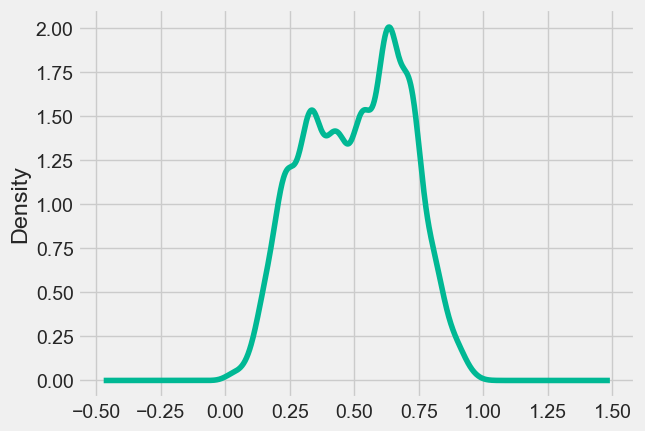

In [343]:
# Plotting the data distribution for the 'temp' feature.

bike_dataset['temp'].plot(kind='density', color='#00b894')

<Axes: ylabel='Density'>

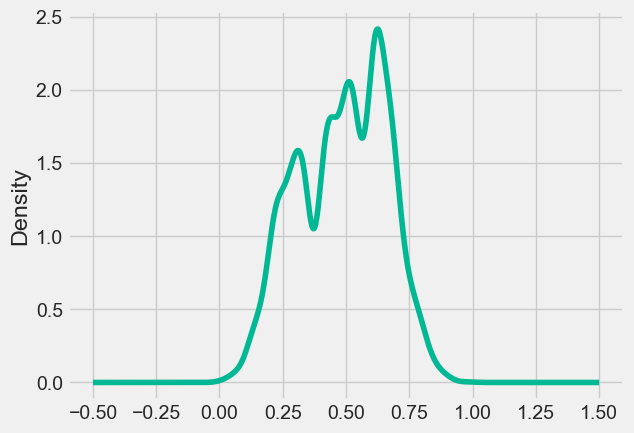

In [344]:
# Plotting the data distribution for the 'atemp' feature.

bike_dataset['atemp'].plot(kind='density', color='#00b894')

<Axes: ylabel='Density'>

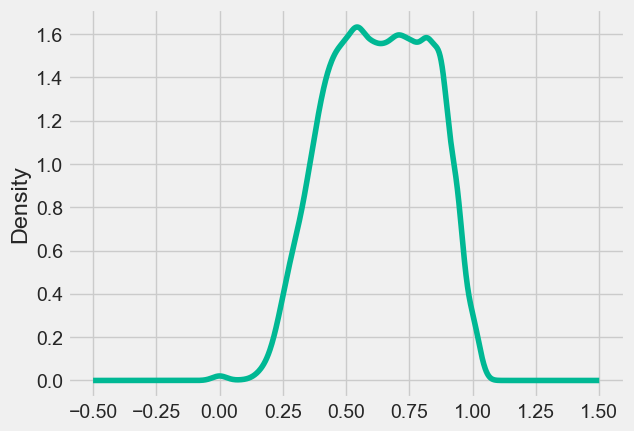

In [345]:
# Plotting the data distribution for the 'hum' feature.

bike_dataset['hum'].plot(kind='density', color='#00b894')

<Axes: ylabel='Density'>

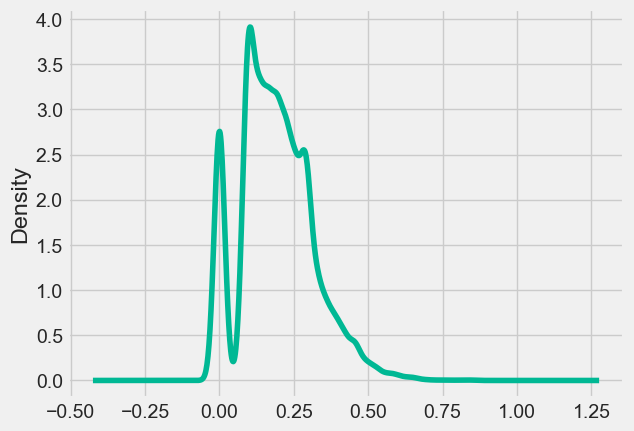

In [346]:
# Plotting the data distribution for the 'windspeed' feature.

bike_dataset['windspeed'].plot(kind='density', color='#00b894')

**Insights**: According to the plottings and the dataset feature description, the `tem`,`atemp`, `hum`, and `windspeed` features are already fairly normalized and don't clearly show outliers, thus their values will be retained as is for the time being.

**If normalization was needed**, the following code could have provided it:

`from sklearn import preprocessing`

`import numpy as np`

`normalized_arr = preprocessing.normalize([dataset_array])`

### **• Data Exploration Plotting:**

Plotting bike usage across user types and other relationships between average bike demand and different dataset features to gain insights into existing demand patterns and feature relevance.

**- Evolution of Total Rented Bikes per Day Segmented by User Type:**

1. Defining a DataFrame 'dfUser' to plot the analysis between different `userType`, where each instant is duplicated for casual/registerd users where `cnt` corresponds to the number of bikes rented by each type.

In [347]:
# Creating a new dataframe with a 'userType' additional column as casual.
dfCasual = bike_dataset.copy().reset_index()
dfCasual['userType'] = 'casual'

# Creating a new dataframe with a 'userType' additional column as registered.
dfReg = bike_dataset.copy().reset_index()
dfReg['userType'] = 'registered'

# Merging these two dataframes with an outer join.
dfUser = pd.merge(dfCasual, dfReg, how='outer')

# Assigning the value of the casual count to the 'cnt' column for all rows in the 'dfUser' dataframe where the 'userType' column equals "casual".
dfUser.loc[dfUser.userType == 'casual', 'cnt'] = dfUser['casual']
# Assigning the value of the registered count to the 'cnt' column for all rows in the 'dfUser' dataframe where the 'userType' column equals "registered".
dfUser.loc[dfUser.userType == 'registered', 'cnt'] = dfUser['registered']

# Removing unecessary columns and displaying the first rows of the resulting dataframe.
dfUser = dfUser.drop(['casual','registered'], axis=1)
dfUser.sort_values(by='instant').head(6)


,dteday,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,day,userType
0,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,1,casual
14773,2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,13,1,registered
1,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,1,casual
14774,2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,32,1,registered
2,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,1,casual
14775,2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,27,1,registered


2. Plotting the evolution of total rented bikes per day segmented by user type.

In [348]:
# Plotting the evolution of total rented bikes per day segmented by user type.

px.histogram(dfUser, x='dteday', y="cnt", color='userType', color_discrete_sequence = ['darkblue', '#00b894'], title='Total Rented Bikes per Day - Segmented by User Type')

<center><img src="static/Img/JS_Charts/rentals_evolution_userType.png"/></center>

**Insight**: As it can be seen, registration appears to be extremely popular, as the majority of renting bike occurences appear to belong to this user type.

**- Average Usage of Shared Bikes for Categorical Variables:**

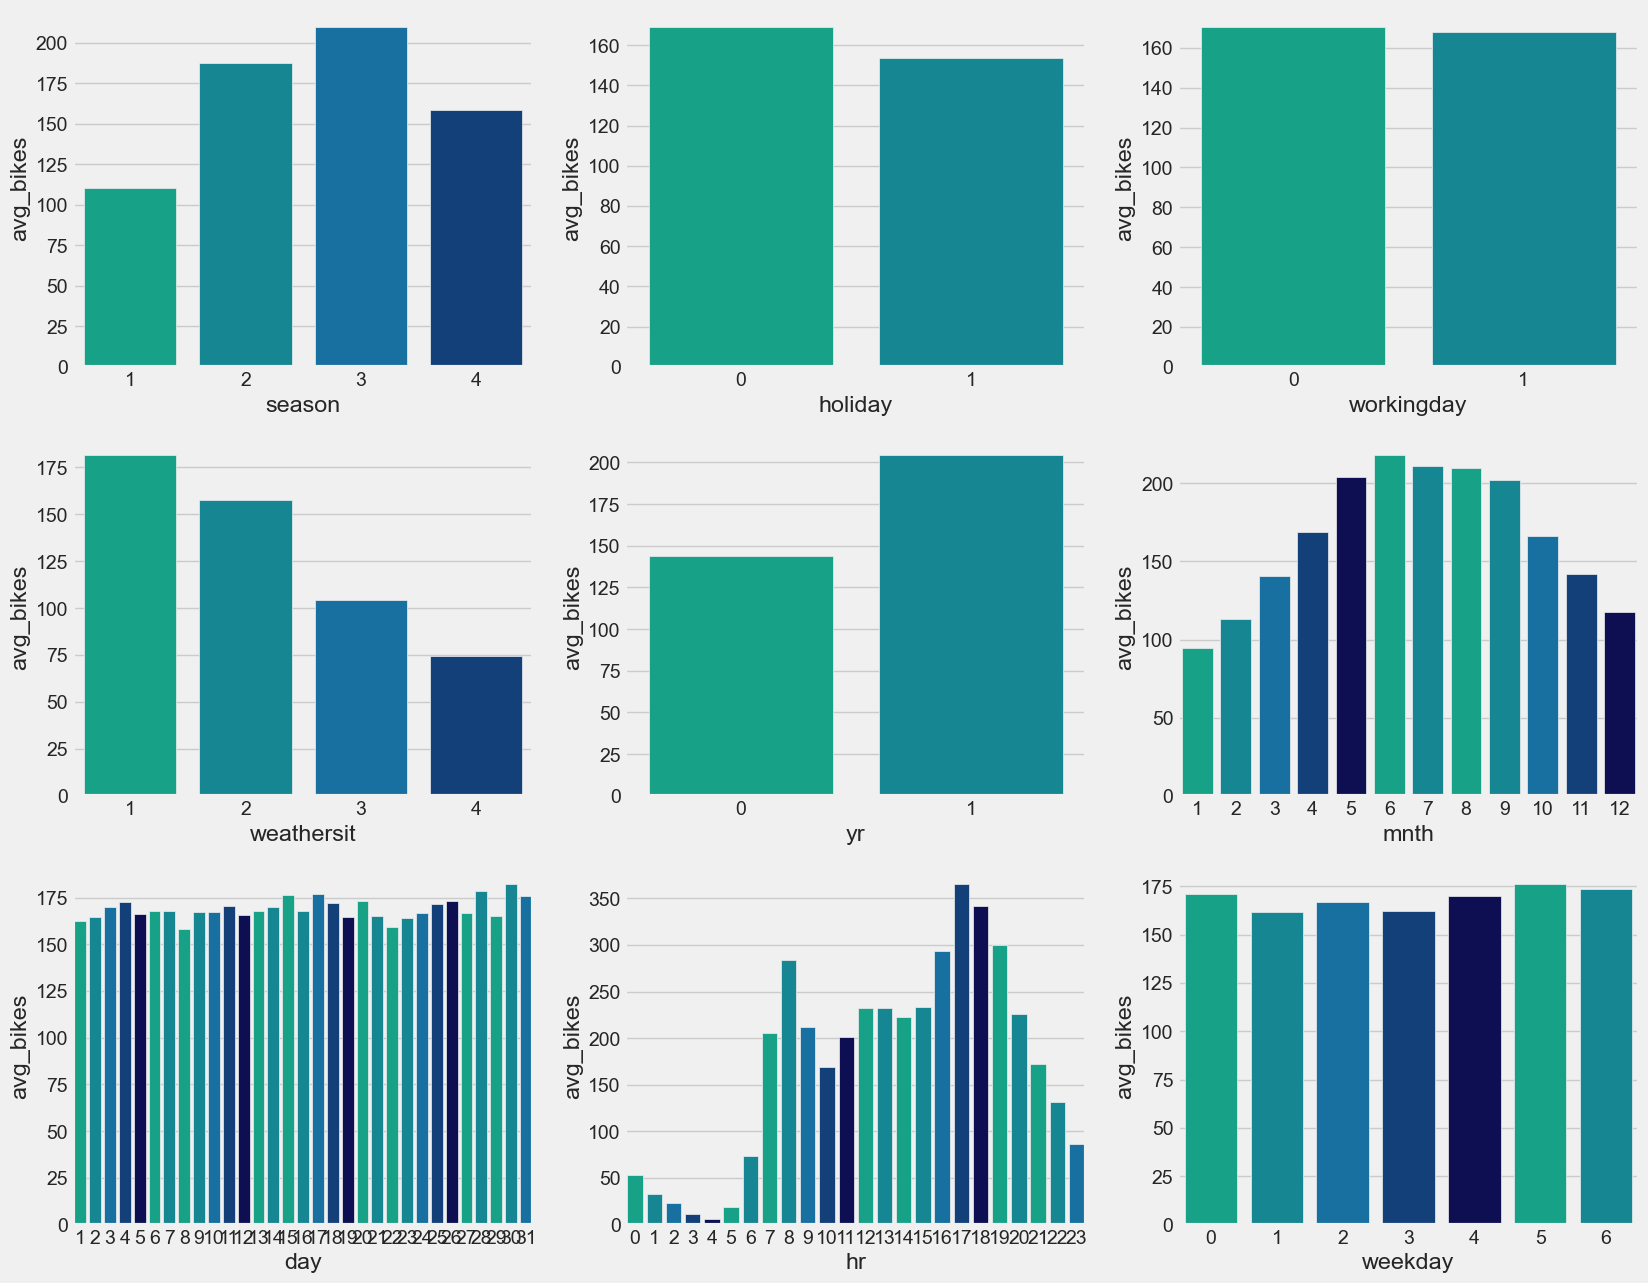

In [349]:
# Defining the graphs coloring settings.
n_colors = 7
palette = sns.color_palette(["#00b894", "#0097a7", "#0077b6", "#023e8a", "#03045e"], n_colors=n_colors)

# Plotting the average usage of shared bikes for categorical variables.
fig, ax = plt.subplots(3, 3, figsize=(18, 15))

for i in range(len(categorical_variables)):
    var = categorical_variables[i]
    sns.barplot(ax=ax[int(i/3), i-int(i/3)*3], data=bike_dataset.groupby(var, as_index=False)["cnt"].mean().rename({"cnt":"avg_bikes"}, axis=1), 
                x=var, y="avg_bikes", palette=palette)

**Main Insights:**

- **Season:** The highest average shared bike rentals occurs during Summer (2) and Fall (3).
- **Working Day:** The average number of shared bikes rented is nearly the same during working (1) and non working (0) days.
- **Weather Sit:** As expected, days with better weather conditions register more bike rentals.
- **Hour:** In terms of bike rentals, it appears that there are two peaks, from 7h to 9h and from 16h to 19h.

**- Average Usage of Shared Bikes for Numerical Variables:**

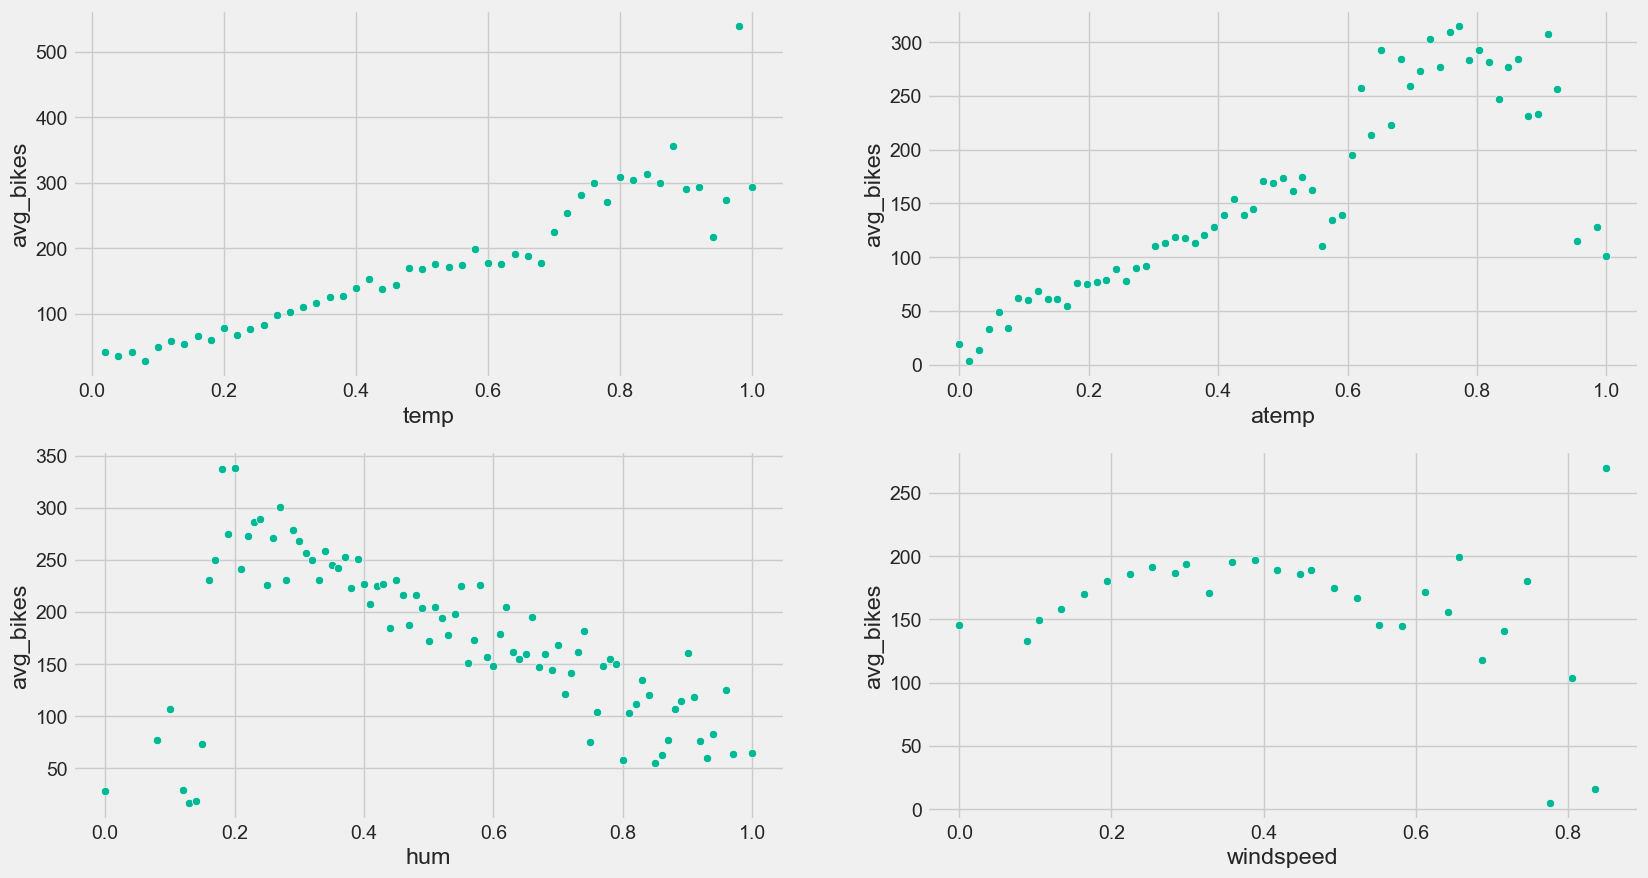

In [350]:
# Plotting the average usage of shared bikes for numerical variables.

fig, ax = plt.subplots(2,2, figsize=(18,10))

for i in range(len(numerical_variables)):
    var = numerical_variables[i]
    sns.scatterplot(ax=ax[int(i/2),i-int(i/2)*2], data=bike_dataset.groupby(var,as_index=False)["cnt"].mean().rename({"cnt":"avg_bikes"},axis=1), x=var, y="avg_bikes", color='#00b894')

**Main Insights:**

- **Temp and Atemp:** Higher temperatures or temperature feeling typically generate more bike rentals.
- **Humidity:** There is a negative correlation between humidity levels and average shared bike rents.

**- Average Usage of Shared Bikes per Hour Segmented by Working and Not-Working Days:**

In [351]:
# Grouping the data by hour and working day and computing the average number of bike rentals
peakhour = bike_dataset.groupby(["hr", "workingday"], as_index=False)["cnt"].mean()

# Plotting the average number of bike rentals by hour and working day.
fig = px.line(peakhour, x='hr', y='cnt', color='workingday', markers=True,
              color_discrete_sequence=['#00b894', '#023e8a'])
fig.update_layout(title='Average Bike Rentals by Hour and Working Day',
                  xaxis_title='Hour',
                  yaxis_title='Average Bike Rentals')
fig.show()

<center><img src="static/Img/JS_Charts/average_usage_workingday.png"/></center>

**Main Insights:**

According to this chart, there is a clear division in consumption per day hour, which is why a new variable `dayInstant` with the following time periods will be created:
- **'morning'** : 6-9h
- **'midday'** : 10-17h
- **'afternoon'** : 18-21h
- **'night'** : 22-5h

In [352]:
# Creating a new variable 'dayInstant' with 4 different time periods.

def dayInstant(hr):
    if 6 <= hr and hr <= 9: return 'morning'
    elif 10 <= hr and hr <= 17: return 'midday'
    elif 18 <= hr and hr <= 21: return 'afternoon'
    else: return 'night'

bike_dataset['dayInstant'] = bike_dataset['hr'].apply(lambda x: dayInstant(x))
dfUser['dayInstant'] = dfUser['hr'].apply(lambda x: dayInstant(x))

In [353]:
# Check if the new column was added.
bike_dataset

#Checked: The column was successfully added.

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,day,dayInstant
dteday,,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,1,night
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,1,night
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,1,night
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,1,night
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,1,night
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30,15207,4,1,9,19,0,0,0,3,0.50,0.4848,0.72,0.1343,34,223,257,30,afternoon
2012-09-30,15208,4,1,9,20,0,0,0,3,0.50,0.4848,0.72,0.1343,31,163,194,30,afternoon
2012-09-30,15209,4,1,9,21,0,0,0,1,0.50,0.4848,0.68,0.0000,19,104,123,30,afternoon


**- Average Usage of Shared Bikes per Weekday Segmented by Casual and Registered Users:**

In [354]:
# Grouping the data by weekday and user type and computing the average number of bike rentals
weekly = dfUser.loc[dfUser.holiday == 0, :].groupby(["weekday", "userType"], as_index=False)["cnt"].mean()

# Plotting the average number of bike rentals by weekday and user type.
fig = px.bar(weekly, x='weekday', y='cnt', color='userType',
             color_discrete_map={'registered': '#00b894', 'casual': '#023e8a'})
fig.update_layout(title='Average Bike Rentals by Weekday and User Type',
                  xaxis_title='Weekday',
                  yaxis_title='Average Bike Rentals')
fig.show()

<center><img src="static/Img/JS_Charts/average_usage_week_day.png"/></center>

**Main Insight:**

Despite the fact that registered users dominate bike rentals during the week, casual users register their highests rental rates on Saturdays and Sundays.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **PART III: Feature Engineering**

### **• Feature Creation:**

Transforming raw data into new variables, features, or characteristics that can provide additional information, improve model performance, and aid in the identification of patterns and relationships in the data.

**- Percentage of Registered Bikes Over Total Count:**

- `pct_registered` = `registered` / `cnt`

According to the plotted charts, `pct registered` varies significantly depending on some of the categorical variables such as `mnth`, `hr`, or `workingday`, so this feature will be aggregated in the model on a "hourly" and "monthly" basis.

In [355]:
# Adding the percentage of registered bikes over total count feature.

bike_dataset['pct_registered'] = bike_dataset['registered']/bike_dataset['cnt']

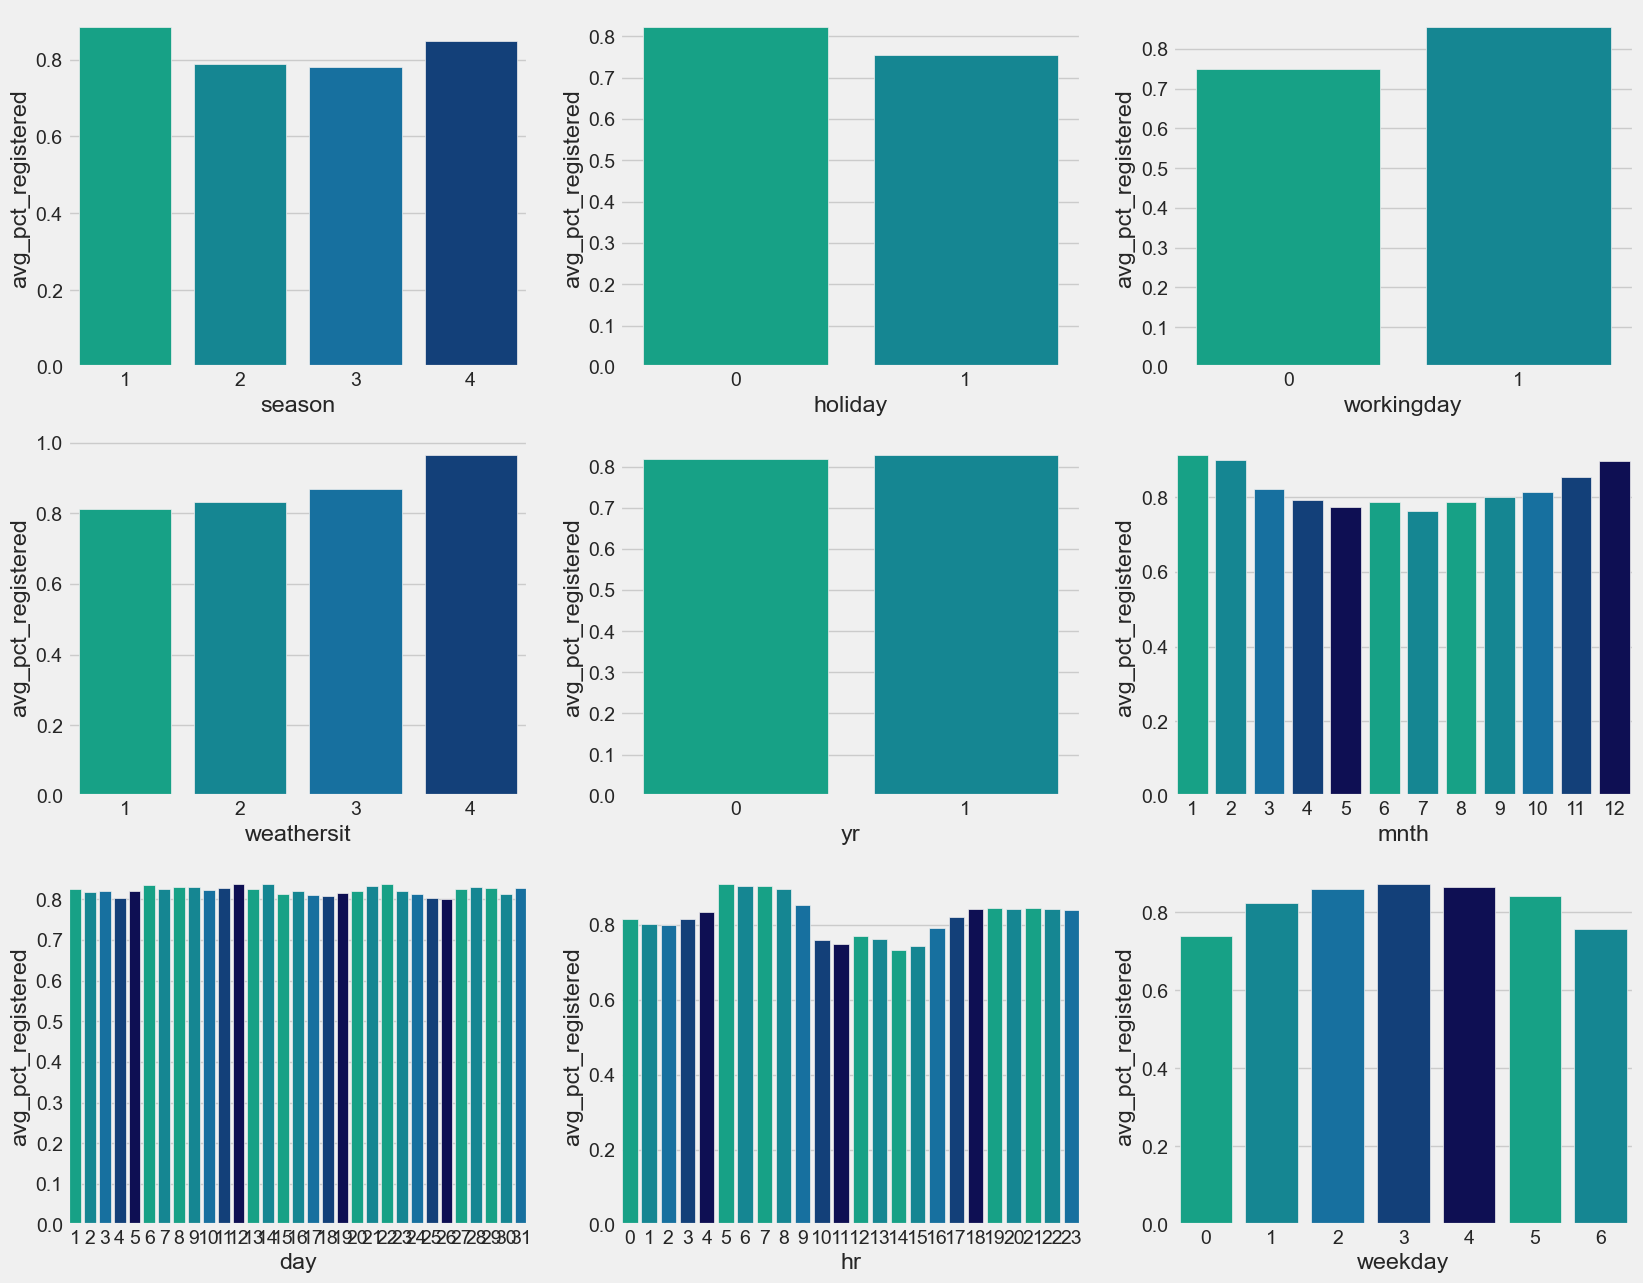

In [356]:
# Defining the graphs coloring settings.
n_colors = 7
palette = sns.color_palette(["#00b894", "#0097a7", "#0077b6", "#023e8a", "#03045e"], n_colors=n_colors)

fig, ax = plt.subplots(3,3, figsize=(18,15))

for i in range(len(categorical_variables)):
    var = categorical_variables[i]
    sns.barplot(ax=ax[int(i/3),i-int(i/3)*3], data=bike_dataset.groupby(var,as_index=False)["pct_registered"].mean().rename({"pct_registered":"avg_pct_registered"},axis=1), x=var, y="avg_pct_registered", palette=palette)

In [357]:
# Aggregating the percentage of registered bikes over total count feature on a hourly basis.
pct_registered_hourly = bike_dataset.groupby('hr')['pct_registered'].mean().to_dict()
bike_dataset['pct_registered_hourly'] = bike_dataset['hr'].map(pct_registered_hourly)

# Aggregating the percentage of registered bikes over total count feature on a monthly basis.
pct_registered_monthly = bike_dataset.groupby('mnth')['pct_registered'].mean().to_dict()
bike_dataset['pct_registered_monthly'] = bike_dataset['mnth'].map(pct_registered_monthly)

In [358]:
# Check the dataset features information.

bike_dataset.info()

# Checked: The new features were successfully added.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14773 entries, 2011-01-01 to 2012-09-30
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 14773 non-null  int64  
 1   season                  14773 non-null  int64  
 2   yr                      14773 non-null  int64  
 3   mnth                    14773 non-null  int64  
 4   hr                      14773 non-null  int64  
 5   holiday                 14773 non-null  int64  
 6   weekday                 14773 non-null  int64  
 7   workingday              14773 non-null  int64  
 8   weathersit              14773 non-null  int64  
 9   temp                    14773 non-null  float64
 10  atemp                   14773 non-null  float64
 11  hum                     14773 non-null  float64
 12  windspeed               14773 non-null  float64
 13  casual                  14773 non-null  int64  
 14  registered           

**- Night and Day Feature:**

The number of rentals varies significantly depending on the day light, according to the plotted charts. There are more rentals during the 'day' than during the 'night,' hence why this is an important variable to include in the model.

- **'night'** : 0
- **'day'** : 1

In [359]:
# Adding the night and day feature.

bike_dataset["day_night"] = bike_dataset['hr'].apply(lambda x: 1 if x >= 7 and x <= 23 else 0)
bike_dataset.groupby('day_night')['cnt'].mean()

day_night
0     31.624829
1    226.512165
Name: cnt, dtype: float64

In [360]:
# Check the dataset.

bike_dataset

# Checked: The new feature was successfully added.

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,...,windspeed,casual,registered,cnt,day,dayInstant,pct_registered,pct_registered_hourly,pct_registered_monthly,day_night
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,0,6,0,1,0.24,...,0.0000,3,13,16,1,night,0.812500,0.816317,0.912713,0
2011-01-01,2,1,0,1,1,0,6,0,1,0.22,...,0.0000,8,32,40,1,night,0.800000,0.801855,0.912713,0
2011-01-01,3,1,0,1,2,0,6,0,1,0.22,...,0.0000,5,27,32,1,night,0.843750,0.799038,0.912713,0
2011-01-01,4,1,0,1,3,0,6,0,1,0.24,...,0.0000,3,10,13,1,night,0.769231,0.817317,0.912713,0
2011-01-01,5,1,0,1,4,0,6,0,1,0.24,...,0.0000,0,1,1,1,night,1.000000,0.834292,0.912713,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30,15207,4,1,9,19,0,0,0,3,0.50,...,0.1343,34,223,257,30,afternoon,0.867704,0.845356,0.801995,1
2012-09-30,15208,4,1,9,20,0,0,0,3,0.50,...,0.1343,31,163,194,30,afternoon,0.840206,0.844074,0.801995,1
2012-09-30,15209,4,1,9,21,0,0,0,1,0.50,...,0.0000,19,104,123,30,afternoon,0.845528,0.846349,0.801995,1


### **• Multivariate Analysis:**

Analyzing and modeling the relationships between multiple variables simultaneously to gain insights into complex systems and identify patterns or trends that may not be visible in univariate analyses.

**- Correlation Checking for Numerical Variables (Pearson Correlation):**

The **Pearson correlation coefficient** is a measure of the linear correlation between two numerical variables, with a value ranging from -1 to 1. A value of one indicates a perfect positive correlation, a value of zero indicates no correlation, and a value of minus one indicates a perfect negative correlation.

In this case, the Pearson correlation will be used to <u>determine which features in the correlation DataFrame are most strongly correlated with the target variable "cnt" and among themselves.</u>

1. **Polinomial Features Creation:**

In order to better observe variable interaction and to possibly enrich the model quality, high-order and combination polynomial features will be used for the variables `temp`, `atemp`, `hum`, and `windspeed`. 

This step can be useful in capturing non-linear relationships between variables and the target variable that linear models alone cannot capture.

In [361]:
# Creating the polynomial features using the variables 'temp', 'atemp', 'hum', and 'windspeed'.
correlation = bike_dataset.loc[:,[
    'temp',
    'atemp',
    'hum',
    'windspeed',
]]

poly = PolynomialFeatures(2)

# Using the fit_transform method of the PolynomialFeatures object to generate polynomial features for the columns in 'correlation'.
# Converting the resulting array into a DataFrame with column names obtained from poly.get_feature_names_out.
# Dropping the first column of the resulting DataFrame which contains only ones (redundant).
correlation = pd.DataFrame(poly.fit_transform(correlation), columns=poly.get_feature_names_out(correlation.columns)).drop(['1'], axis=1)

# Adding the target variable 'cnt' from the original dataset to the 'correlation' DataFrame.
# This is done to retain the target variable for correlation analysis.
correlation['cnt'] = bike_dataset.reset_index().loc[:,'cnt']
correlation.head()

,temp,atemp,hum,windspeed,temp^2,temp atemp,temp hum,temp windspeed,atemp^2,atemp hum,atemp windspeed,hum^2,hum windspeed,windspeed^2,cnt
0,0.24,0.2879,0.81,0.0,0.0576,0.069096,0.1944,0.0,0.082886,0.233199,0.0,0.6561,0.0,0.0,16
1,0.22,0.2727,0.80,0.0,0.0484,0.059994,0.1760,0.0,0.074365,0.218160,0.0,0.6400,0.0,0.0,40
2,0.22,0.2727,0.80,0.0,0.0484,0.059994,0.1760,0.0,0.074365,0.218160,0.0,0.6400,0.0,0.0,32
3,0.24,0.2879,0.75,0.0,0.0576,0.069096,0.1800,0.0,0.082886,0.215925,0.0,0.5625,0.0,0.0,13
4,0.24,0.2879,0.75,0.0,0.0576,0.069096,0.1800,0.0,0.082886,0.215925,0.0,0.5625,0.0,0.0,1


2. **Pearson Correlation Results:**

In [362]:
# Computing the Pearson correlation coefficients between all pairs of variables with the 'cnt'.
correlation.corr()['cnt'].sort_values(ascending=False)

cnt                1.000000
temp^2             0.432247
temp               0.430346
temp atemp         0.430250
atemp^2            0.426454
atemp              0.424521
temp windspeed     0.325287
atemp windspeed    0.318815
windspeed          0.098052
temp hum           0.084342
windspeed^2        0.070204
atemp hum          0.065512
hum windspeed     -0.058228
hum               -0.327690
hum^2             -0.330570
Name: cnt, dtype: float64

In [363]:
# Computing the correlation coefficients between all variables in the 'correlation' DataFrame and sort them by correlation with 'cnt'.

correlation = correlation.corr().sort_values('cnt', ascending=False)

# Converting the correlation matrix to a NumPy array.
zz = np.array(correlation)

# Creating an annotated heatmap of the correlation matrix.
fig = ff.create_annotated_heatmap(
    zz,
    x = list(correlation.columns),
    y = list(correlation.index),
    annotation_text = np.around(zz, decimals=2),
    hoverinfo='z',
    colorscale= 'Greens'
)

# Setting the size of the heatmap figure.
fig.update_layout(
    height=800,
    width = 800
)

**Main Insights:**

Given the correlation matrix results, and the high risk of multicollinearity that some of the added polynomial features presented only **'temp*windspeed'** and **'hum^2'** will be included in the DataFrame.

Additionally, **'atemp'** and **'hum'** will be dropped later given their high correlation with other features and the risk of propagating multicollinearity.

In [364]:
# Adding the 'temp*windspeed' and 'hum^2' features to the DataFrame.

bike_dataset['temp*windspeed'] = bike_dataset['temp']*bike_dataset['windspeed']
bike_dataset['hum^2'] = np.square(bike_dataset['hum'])

In [365]:
# Dropping 'atemp' and 'hum' features.

bike_dataset = bike_dataset.drop(['atemp', 'hum'], axis=1)

In [366]:
# Check the dataset.

bike_dataset.info()

# Checked: The new features were successfully added while 'atemp' and 'hum' were dropped.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14773 entries, 2011-01-01 to 2012-09-30
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 14773 non-null  int64  
 1   season                  14773 non-null  int64  
 2   yr                      14773 non-null  int64  
 3   mnth                    14773 non-null  int64  
 4   hr                      14773 non-null  int64  
 5   holiday                 14773 non-null  int64  
 6   weekday                 14773 non-null  int64  
 7   workingday              14773 non-null  int64  
 8   weathersit              14773 non-null  int64  
 9   temp                    14773 non-null  float64
 10  windspeed               14773 non-null  float64
 11  casual                  14773 non-null  int64  
 12  registered              14773 non-null  int64  
 13  cnt                     14773 non-null  int64  
 14  day                  

**- Categorical Feature Importance (ANOVA Analysis):**

The **ANOVA** method is a statistical technique for comparing the means of two or more groups. ANOVA can be used to determine whether there is a statistically significant difference in the means of different groups or whether a specific factor or variable is influencing the outcome variable.

In this case, ANOVA will be used to <u>determine the importance of different categorical variables in predicting the target variable cnt (the number of bike rentals).</u>

In [367]:
# Selecting a subset of the categorical variables.
corrAnova = bike_dataset.loc[:,[
    'season',
    'mnth',
    'hr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit',
    'dayInstant',
    'day_night'
]]

# Encoding the 'dayInstant' variable as an ordinal variable so that it can be used in the ANOVA analysis.
enc = OrdinalEncoder()
corrAnova['dayInstant'] = enc.fit_transform(corrAnova['dayInstant'].array.reshape(-1, 1))

# Using the f_classif function to perform the ANOVA analysis.
# This calculates the F-statistic and corresponding p-value for each categorical variable.
lcorr = list(zip(corrAnova.columns, f_classif(corrAnova, bike_dataset.cnt)[0]))

# Converting the list of tuples to a DataFrame and sort it by the F-statistic in descending order.
lcorr = pd.DataFrame(lcorr, columns=['Feature','Importance']).sort_values(by='Importance', ascending=False)

#Creating a bar chart of the categorical variables and their corresponding F-statistics importance.
px.bar(lcorr, x='Feature', y='Importance', color_discrete_sequence=['#00b894'], title='ANOVA Importance of Categorical Variables in Predicting Bike Rental Counts')

<center><img src="static/Img/JS_Charts/anova.png"/></center>

**Main Insight:**

According to the chart, the categorical variables with the highest importance are `day_night`, `dayInstant` and `hr` which in a way share a lot of the same information.

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **PART IV: Modelling and Evaluation**

### **• Data Preparation:**

Preparing the data in a format suitable for the predictive model.

**- Defining X and Y:**

Defining and adapting the independent (X) and dependent (Y) variables to be used in the different models.

In [368]:
# - Defining the independent (X_bike) features.

X_bike = bike_dataset.loc[:,[
    'season',
    'mnth',
    'hr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit',
    'temp',
    'hum^2',
    'windspeed',
    'temp*windspeed',
    'dayInstant',
    'day_night',
    'pct_registered_hourly',
    'pct_registered_monthly'
]]

**Note** - The following features were not considered for the model:
- `casual` and `registered`: the same information is already present as `pct_registered_hourly` and `pct_registered_monthly`;
- `day` : the same information is alreary present as `weekday` (with the index serving as a reference);
- `instant` : since it added no value;
- `year`: since it didn't add a lot of value and the index already serves as a reference.

In [369]:
# Check the X_bike data.

X_bike

# Checked: X_bike = Features' Columns

,season,mnth,hr,holiday,weekday,workingday,weathersit,temp,hum^2,windspeed,temp*windspeed,dayInstant,day_night,pct_registered_hourly,pct_registered_monthly
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,0,6,0,1,0.24,0.6561,0.0000,0.000000,night,0,0.816317,0.912713
2011-01-01,1,1,1,0,6,0,1,0.22,0.6400,0.0000,0.000000,night,0,0.801855,0.912713
2011-01-01,1,1,2,0,6,0,1,0.22,0.6400,0.0000,0.000000,night,0,0.799038,0.912713
2011-01-01,1,1,3,0,6,0,1,0.24,0.5625,0.0000,0.000000,night,0,0.817317,0.912713
2011-01-01,1,1,4,0,6,0,1,0.24,0.5625,0.0000,0.000000,night,0,0.834292,0.912713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30,4,9,19,0,0,0,3,0.50,0.5184,0.1343,0.067150,afternoon,1,0.845356,0.801995
2012-09-30,4,9,20,0,0,0,3,0.50,0.5184,0.1343,0.067150,afternoon,1,0.844074,0.801995
2012-09-30,4,9,21,0,0,0,1,0.50,0.4624,0.0000,0.000000,afternoon,1,0.846349,0.801995


In [370]:
# - Defining the target column (Y_bike).

Y_bike = bike_dataset.loc[:,['cnt']]

In [371]:
# Check the Y_bike column.

Y_bike

# Checked: Y_bike = 'cnt' or Target Column

,cnt
dteday,
2011-01-01,16
2011-01-01,40
2011-01-01,32
2011-01-01,13
2011-01-01,1
...,...
2012-09-30,257
2012-09-30,194
2012-09-30,123


**- Creating Dummy Variables for Categorical Columns:**

Converting categorical features into a set of binary columns (0 or 1) for each category in an original data column.

In [372]:
# Converting categorical features into dummy values.

X_bike = pd.get_dummies(X_bike, columns=['season','mnth','weekday','weathersit','dayInstant'])

In [373]:
# Check the X_bike data.

X_bike

# Checked: Categorical features were succesfully converted to dummy values.

,hr,holiday,workingday,temp,hum^2,windspeed,temp*windspeed,day_night,pct_registered_hourly,pct_registered_monthly,...,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4,dayInstant_afternoon,dayInstant_midday,dayInstant_morning,dayInstant_night
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0,0,0,0.24,0.6561,0.0000,0.000000,0,0.816317,0.912713,...,0,1,1,0,0,0,0,0,0,1
2011-01-01,1,0,0,0.22,0.6400,0.0000,0.000000,0,0.801855,0.912713,...,0,1,1,0,0,0,0,0,0,1
2011-01-01,2,0,0,0.22,0.6400,0.0000,0.000000,0,0.799038,0.912713,...,0,1,1,0,0,0,0,0,0,1
2011-01-01,3,0,0,0.24,0.5625,0.0000,0.000000,0,0.817317,0.912713,...,0,1,1,0,0,0,0,0,0,1
2011-01-01,4,0,0,0.24,0.5625,0.0000,0.000000,0,0.834292,0.912713,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30,19,0,0,0.50,0.5184,0.1343,0.067150,1,0.845356,0.801995,...,0,0,0,0,1,0,1,0,0,0
2012-09-30,20,0,0,0.50,0.5184,0.1343,0.067150,1,0.844074,0.801995,...,0,0,0,0,1,0,1,0,0,0
2012-09-30,21,0,0,0.50,0.4624,0.0000,0.000000,1,0.846349,0.801995,...,0,0,1,0,0,0,1,0,0,0


In [374]:
X_bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14773 entries, 2011-01-01 to 2012-09-30
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hr                      14773 non-null  int64  
 1   holiday                 14773 non-null  int64  
 2   workingday              14773 non-null  int64  
 3   temp                    14773 non-null  float64
 4   hum^2                   14773 non-null  float64
 5   windspeed               14773 non-null  float64
 6   temp*windspeed          14773 non-null  float64
 7   day_night               14773 non-null  int64  
 8   pct_registered_hourly   14773 non-null  float64
 9   pct_registered_monthly  14773 non-null  float64
 10  season_1                14773 non-null  uint8  
 11  season_2                14773 non-null  uint8  
 12  season_3                14773 non-null  uint8  
 13  season_4                14773 non-null  uint8  
 14  mnth_1               

### **• Predicting & Tuning Stages:**

Training several models (some with multiple hyperparameters) in order to make accurate predictions on new or unseen data. 

For this three validation methods will be used:
- **Train & Test Split**
- **K-Fold Cross**

(**Note:** Leave One Out will not be performed given the size of the dataset and the time it would take to run all the models for the different hyperparameters.)

The **performance metrics** that will be used to evaluate the predictive accuracy of the models are:

- **MAE (Mean Absolute Error)**: The average absolute difference between the predicted and actual values. It measures how close the predictions are to the true values.
- **MSE (Mean Squared Error)**: The average squared difference between the predicted and actual values. It puts more weight on large errors and is useful for detecting outliers.
- **R-Squared (Coefficient of Determination)**: The proportion of the variance in the target variable that can be explained by the model. It measures how well the model fits the data and ranges from 0 to 1, with higher values indicating a better fit.

### <u>**- Validation Method 1: Train & Test Split** </u>

Spliting the available data into two sets: a train set that is used for training the model, and a test set that is used for testing the model.

In [375]:
# Performing a train and test split.
X_train_bike, X_test_bike, Y_train_bike, Y_test_bike = train_test_split(X_bike, Y_bike, test_size=0.2, random_state=3)

#### **- Data Preprocessing (Scaling):**

Scale the data so that all variables have similar value ranges. In this case, StandardScaler is an excellent choice for feature scaling because it transforms the features by removing the mean and scaling to unit variance.

Given the models that will be used, namely linear regression, stochastic gradient descent, and MLP regressor, which can be sensitive to the scale of input features, feature scaling can be beneficial. Although decision trees, random forests, and XGBoost are less sensitive to feature scaling, using it should have no detrimental effects on their performance.

(Note: This scaling will also be used in the following Validation Method: K-Fold Cross and in the PCA application.)


In [376]:
# Performing preprocessing scaling of the train and test data.
sc = StandardScaler()

X_train_bike = sc.fit_transform(X_train_bike)
X_test_bike = sc.transform(X_test_bike)

### **‣ Linear Regression**
Linear regression is a statistical method used to find the relationship between a target variable (Y) and one or more independent variables (X). It assumes that the relationship between the variables is linear, meaning that a change in the independent variable is associated with a proportional change in the dependent variable.

In [377]:
# Creating a Linear Regression model and fitting it to the training data.
linreg_val1 = LinearRegression().fit(X_train_bike,Y_train_bike)

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike = linreg_val1.predict(X_test_bike)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike)}")

# Conclusion: there are better and faster combinations of validation methods and prediction models.

MAE from TestSet: 74.11987883908752
MSE from TestSet: 9827.82536350453
R-squared from TestSet: 0.5737123170861346


### **‣ Stochastic Gradient Descent**
Stochastic gradient descent is an optimization algorithm that is used to find the minimum of a cost function (the difference between the predicted value and the actual value) by iteratively adjusting the parameters in the direction of steepest descent of the function.

In [378]:
# Defining the hyperparameters to be tuned.
param_grid0 = {
    'alpha': [1e-5, 1e-4, 1e-3],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-6, 1e-5, 1e-4, 1e-3],
    'eta0': [0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal','adaptive']
}

# Creating a grid search object with the Stochastic Gradient Descent, the hyperparameter grid, and other settings.
stochastic_grad_val1 = GridSearchCV(
    SGDRegressor(), param_grid0, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
stochastic_grad_val1.fit(X_train_bike, Y_train_bike.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike = stochastic_grad_val1.predict(X_test_bike)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike)}")

# Conclusion: there are better and faster combinations of validation methods and prediction models.

MAE from TestSet: 73.97886267711728
MSE from TestSet: 9810.06375891321
R-squared from TestSet: 0.5744827370911729


### **‣ Decision Tree Regressor**

Decision Tree Regressor is a simple but powerful non-parametric algorithm for regression tasks. It works by recursively splitting the training data into smaller subsets based on one of the input feature values and fitting a decision tree to each subset.

In [379]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid1 = {
    'max_depth':[10,12,14,15,16,18],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,5,6],
    'min_samples_split': [2,3,4],
    'random_state': [3],
}

# Creating a grid search object with the Decision Tree Regressor, the hyperparameter grid, and other settings.
decision_tree_val1 = GridSearchCV(
    DecisionTreeRegressor(), param_grid1, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
decision_tree_val1.fit(X_train_bike, Y_train_bike.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike = decision_tree_val1.predict(X_test_bike)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike)}")

# Conclusion: There are better and faster combinations of validation methods and prediction models.

MAE from TestSet: 56.12659083610929
MSE from TestSet: 7338.515723548248
R-squared from TestSet: 0.6816875811168448


### **‣ Random Forest Regressor**
Random Forest Regressor is an ensemble learning method that builds a regression model using a combination of decision trees. It works by constructing multiple decision trees, each based on a random subset of the data and features. The final prediction is calculated by averaging the predictions from these decision trees.

In [380]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid2 = {
    'max_depth':[10,12,14,15,16,18],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,5,6],
    'min_samples_split': [2,3,4],
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': [100],
    'random_state': [3],
    'verbose': [0],
}

# Creating a grid search object with the RandomForestRegressor estimator, the hyperparameter grid, and other settings.
random_forest_val1 = GridSearchCV(
    RandomForestRegressor(), param_grid2, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
random_forest_val1.fit(X_train_bike, Y_train_bike.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike = random_forest_val1.predict(X_test_bike)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike)}")

# Conclusion: There are better and faster combinations of validation methods and prediction models.

MAE from TestSet: 38.89529083705151
MSE from TestSet: 3338.6367687547827
R-squared from TestSet: 0.8551846741672258


### **‣ XGBoost**
XGBoost (Extreme Gradient Boosting) is a popular gradient boosting implementation that is optimized for speed and performance. It employs a scalable and parallelizable gradient boosting approach based on decision trees. XGBoost also incorporates a number of regularization techniques to prevent overfitting, including L1 and L2 regularization, and dropout.

In [381]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

# Creating a grid search object with the XGBRegressor, the hyperparameter grid, and other settings.
xgboost_val1 = GridSearchCV(
    XGBRegressor(), param_grid3, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
xgboost_val1.fit(X_train_bike, Y_train_bike.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike = xgboost_val1.predict(X_test_bike)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike)}")

# Conclusion: Best combination of validation methods and prediction models.

MAE from TestSet: 34.18524585863459
MSE from TestSet: 2699.852594433357
R-squared from TestSet: 0.8828923119692497


### **‣ MLP Regressor**
MLPs (Multilayer Perceptron) are a type of artificial neural networks that are commonly used for regression analysis. The MLP is a feedforward neural network with an input layer, one or more hidden layers, and an output layer. Each layer contains a set of neurons that use weights and activation functions to perform computations.

The goal of MLP regression is to predict a continuous output variable based on a set of input features. The network is trained by adjusting the weights using an optimization algorithm such as backpropagation to minimize the difference between the predicted and actual output.

In [382]:
# Defining the hyperparameter grid to search over.
param_grid4 = {
    'hidden_layer_sizes': [(50,25)],
    'activation': ['relu'],
    'alpha': [0.001, 0.01],
    'max_iter': [500],
    'solver' : ['adam']
}

# Creating a grid search object with the MLPRegressor, the hyperparameter grid, and other settings.
mlp_val1 = GridSearchCV(MLPRegressor(), param_grid4, cv=3, scoring='neg_mean_squared_error')

# Fitting the grid search object to the training data.
mlp_val1.fit(X_train_bike, Y_train_bike.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike = mlp_val1.predict(X_test_bike)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike)}")

# Conclusion: There are better and faster combinations of validation methods and prediction models.

MAE from TestSet: 40.55001319477403
MSE from TestSet: 3557.9478518275823
R-squared from TestSet: 0.8456719274524127


### <u>**- Validation Method 2: K-Fold Cross** </u>

Dividing a dataset into k equal-sized groups (or folds). The model is then trained and assessed k times, with each fold serving as the validation set once and the remaining k-1 folds serving as the training set. This procedure generates k assessment scores, which are then averaged to yield a single estimate of model performance.

### **‣ Linear Regression**
Linear regression is a statistical method used to find the relationship between a target variable (Y) and one or more independent variables (X). It assumes that the relationship between the variables is linear, meaning that a change in the independent variable is associated with a proportional change in the dependent variable.

In [383]:
# Creating a KFold object with 5 folds.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing arrays to store the metrics for each fold.
mae_scores = []
mse_scores = []
r2_scores = []

# Looping over the folds and fit a Linear Regression model to each training set, and evaluate on the corresponding test set.
for train_index, test_index in kf.split(X_train_bike):
    X_train, X_test = X_train_bike[train_index], X_train_bike[test_index]
    Y_train, Y_test = Y_train_bike.iloc[train_index], Y_train_bike.iloc[test_index]
    
    # Creating a Linear Regression model and fit it to the training data
    linreg_val2 = LinearRegression().fit(X_train, Y_train)

    # Predict the target variable (bike rental count) using the fitted model and test set features
    Y_pred = linreg_val2.predict(X_test)

    # Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
    mae_scores.append(mean_absolute_error(Y_test, Y_pred))

    # Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
    mse_scores.append(mean_squared_error(Y_test, Y_pred))

    # Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
    r2_scores.append(r2_score(Y_test, Y_pred))

# Calculating the Mean Absolute Error from the 5-fold cross-validation.
print(f"Average MAE from 5-fold cross-validation: {np.mean(mae_scores)}")

# Calculating the Mean Squared Error from the 5-fold cross-validation.
print(f"Average MSE from 5-fold cross-validation: {np.mean(mse_scores)}")

# Calculating the R-Squared score from the 5-fold cross-validation.
print(f"Average R-squared from 5-fold cross-validation: {np.mean(r2_scores)}")

# Conclusion: There are better and faster combinations of validation methods and prediction models.

Average MAE from 5-fold cross-validation: 74.53633512374135
Average MSE from 5-fold cross-validation: 9843.347372925637
Average R-squared from 5-fold cross-validation: 0.5723424082758436


### **‣ Stochastic Gradient Descent**
Stochastic gradient descent is an optimization algorithm that is used to find the minimum of a cost function (the difference between the predicted value and the actual value) by iteratively adjusting the parameters in the direction of steepest descent of the function.

In [384]:
# Defining the hyperparameters to be tuned.
param_grid0 = {
    'alpha': [1e-5, 1e-4, 1e-3],
    'max_iter': [1000, 2000, 3000],
    'tol': [1e-6, 1e-5, 1e-4, 1e-3],
    'eta0': [0.001, 0.01, 0.1],
    'learning_rate': ['constant', 'optimal','adaptive']
}

# Creating a KFold object with 5 folds.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing arrays to store the metrics for each fold.
mae_scores = []
mse_scores = []
r2_scores = []

# Looping over the folds and fit a Stochastic Gradient Descent model to each training set, and evaluate on the corresponding test set.
for train_index, test_index in kf.split(X_train_bike):
    X_train, X_test = X_train_bike[train_index], X_train_bike[test_index]
    Y_train, Y_test = Y_train_bike.iloc[train_index], Y_train_bike.iloc[test_index]

    # Creating a grid search object with the Stochastic Gradient Descent, the hyperparameter grid, and other settings.
    stochastic_grad_val2 = GridSearchCV(
        SGDRegressor(), param_grid0, cv=3, scoring='neg_mean_absolute_error', verbose=0
    )

    # Fitting the grid search object to the training data.
    stochastic_grad_val2.fit(X_train, Y_train.values.ravel())

    # Predicting the target variable (bike rental count) using the fitted model and test set features.
    Y_pred = stochastic_grad_val2.predict(X_test)

    # Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
    mae_scores.append(mean_absolute_error(Y_test, Y_pred))

    # Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
    mse_scores.append(mean_squared_error(Y_test, Y_pred))

    # Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
    r2_scores.append(r2_score(Y_test, Y_pred))

# Calculating the Mean Absolute Error from the 5-fold cross-validation.
print(f"Average MAE from 5-fold cross-validation: {np.mean(mae_scores)}")

# Calculating the Mean Squared Error from the 5-fold cross-validation.
print(f"Average MSE from 5-fold cross-validation: {np.mean(mse_scores)}")

# Calculating the R-Squared score from the 5-fold cross-validation.
print(f"Average R-squared from 5-fold cross-validation: {np.mean(r2_scores)}")

# Conclusion: For the time it took to complete, there are better and faster combinations of validation methods and prediction models.

Average MAE from 5-fold cross-validation: 77.15374656336071
Average MSE from 5-fold cross-validation: 10448.842625115149
Average R-squared from 5-fold cross-validation: 0.5464489310621274


### **‣ Decision Tree Regressor**

Decision Tree Regressor is a simple but powerful non-parametric algorithm for regression tasks. It works by recursively splitting the training data into smaller subsets based on one of the input feature values and fitting a decision tree to each subset.

In [385]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid1 = {
    'max_depth':[10,12,14,15,16,18],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,5,6],
    'min_samples_split': [2,3,4],
    'random_state': [3],
}

# Creating a KFold object with 5 folds.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing arrays to store the metrics for each fold.
mae_scores = []
mse_scores = []
r2_scores = []

# Looping over the folds and fit a Decision Tree model to each training set, and evaluate on the corresponding test set.
for train_index, test_index in kf.split(X_train_bike):
    X_train, X_test = X_train_bike[train_index], X_train_bike[test_index]
    Y_train, Y_test = Y_train_bike.iloc[train_index], Y_train_bike.iloc[test_index]
    
    # Creating a grid search object with the Decision Tree Regressor, the hyperparameter grid, and other settings.
    decision_tree_val2 = GridSearchCV(
        DecisionTreeRegressor(), param_grid1, cv=3, scoring='neg_mean_absolute_error', verbose=0
    )

    # Fitting the grid search object to the training data.
    decision_tree_val2.fit(X_train, Y_train.values.ravel())

    # Predicting the target variable (bike rental count) using the fitted model and test set features.
    Y_pred = decision_tree_val2.predict(X_test)

    # Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
    mae_scores.append(mean_absolute_error(Y_test, Y_pred))

    # Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
    mse_scores.append(mean_squared_error(Y_test, Y_pred))

    # Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
    r2_scores.append(r2_score(Y_test, Y_pred))

# Calculating the Mean Absolute Error from the k-fold cross-validation.
print(f"Average MAE from 5-fold cross-validation: {np.mean(mae_scores)}")

# Calculating the Mean Squared Error from the k-fold cross-validation.
print(f"Average MSE from 5-fold cross-validation: {np.mean(mse_scores)}")

# Calculating the R-Squared score from the k-fold cross-validation.
print(f"Average R-squared from 5-fold cross-validation: {np.mean(r2_scores)}")

# Conclusion: There are better and faster combinations of validation methods and prediction models.

Average MAE from 5-fold cross-validation: 52.69657032122573
Average MSE from 5-fold cross-validation: 6337.921698189677
Average R-squared from 5-fold cross-validation: 0.724831843844501


### **‣ Random Forest Regressor**
Random Forest Regressor is an ensemble learning method that builds a regression model using a combination of decision trees. It works by constructing multiple decision trees, each based on a random subset of the data and features. The final prediction is calculated by averaging the predictions from these decision trees.

In [386]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid2 = {
    'max_depth':[10,12,14,15,16,18],
    'max_features': ['sqrt','log2'],
    'min_samples_leaf': [1,5,6],
    'min_samples_split': [2,3,4],
    'min_weight_fraction_leaf': [0.0],
    'n_estimators': [100],
    'random_state': [3],
    'verbose': [0],
}

# Creating a KFold object with 5 folds.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing arrays to store the metrics for each fold.
mae_scores = []
mse_scores = []
r2_scores = []

# Looping over the folds and fit a Random Forest Regressor model to each training set, and evaluate on the corresponding test set.
for train_index, test_index in kf.split(X_train_bike):
    X_train, X_test = X_train_bike[train_index], X_train_bike[test_index]
    Y_train, Y_test = Y_train_bike.iloc[train_index], Y_train_bike.iloc[test_index]
    
    # Creating a grid search object with the Random Forest Regressor estimator, the hyperparameter grid, and other settings.
    random_forest_val2 = GridSearchCV(
        RandomForestRegressor(), param_grid2, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

    # Fitting the grid search object to the training data.
    random_forest_val2.fit(X_train, Y_train.values.ravel())

    # Predicting the target variable (bike rental count) using the fitted model and test set features.
    Y_pred = random_forest_val2.predict(X_test)

    # Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
    mae_scores.append(mean_absolute_error(Y_test, Y_pred))

    # Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
    mse_scores.append(mean_squared_error(Y_test, Y_pred))

    # Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
    r2_scores.append(r2_score(Y_test, Y_pred))

# Calculating the Mean Absolute Error from the k-fold cross-validation.
print(f"Average MAE from 5-fold cross-validation: {np.mean(mae_scores)}")

# Calculating the Mean Squared Error from the k-fold cross-validation.
print(f"Average MSE from 5-fold cross-validation: {np.mean(mse_scores)}")

# Calculating the R-Squared score from the k-fold cross-validation.
print(f"Average R-squared from 5-fold cross-validation: {np.mean(r2_scores)}")

# Conclusion: For the time it took to complete, there are better and faster combinations of validation methods and prediction models.

Average MAE from 5-fold cross-validation: 40.57448288545801
Average MSE from 5-fold cross-validation: 3542.4455948586424
Average R-squared from 5-fold cross-validation: 0.8461391778552508


### **‣ XGBoost**
XGBoost (Extreme Gradient Boosting) is a popular gradient boosting implementation that is optimized for speed and performance. It employs a scalable and parallelizable gradient boosting approach based on decision trees. XGBoost also incorporates a number of regularization techniques to prevent overfitting, including L1 and L2 regularization, and dropout.

In [387]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

# Creating a KFold object with 5 folds.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing arrays to store the metrics for each fold.
mae_scores = []
mse_scores = []
r2_scores = []

# Looping over the folds and fit a XGBoost model to each training set, and evaluate on the corresponding test set.
for train_index, test_index in kf.split(X_train_bike):
    X_train, X_test = X_train_bike[train_index], X_train_bike[test_index]
    Y_train, Y_test = Y_train_bike.iloc[train_index], Y_train_bike.iloc[test_index]
    
    # Creating a grid search object with the XGBoost Regressor, the hyperparameter grid, and other settings.
    xgboost_val1 = GridSearchCV(
        XGBRegressor(), param_grid3, cv=3, scoring='neg_mean_absolute_error', verbose=0
    )

    # Fitting the grid search object to the training data.
    xgboost_val1.fit(X_train, Y_train.values.ravel())

    # Predicting the target variable (bike rental count) using the fitted model and test set features.
    Y_pred = xgboost_val1.predict(X_test)

    # Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
    mae_scores.append(mean_absolute_error(Y_test, Y_pred))

    # Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
    mse_scores.append(mean_squared_error(Y_test, Y_pred))

    # Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
    r2_scores.append(r2_score(Y_test, Y_pred))

# Calculating the Mean Absolute Error from the k-fold cross-validation.
print(f"Average MAE from 5-fold cross-validation: {np.mean(mae_scores)}")

# Calculating the Mean Squared Error from the k-fold cross-validation.
print(f"Average MSE from 5-fold cross-validation: {np.mean(mse_scores)}")

# Calculating the R-Squared score from the k-fold cross-validation.
print(f"Average R-squared from 5-fold cross-validation: {np.mean(r2_scores)}")

# Conclusion: There are better and faster combinations of validation methods and prediction models.

Average MAE from 5-fold cross-validation: 34.846108241686196
Average MSE from 5-fold cross-validation: 2771.7356855587686
Average R-squared from 5-fold cross-validation: 0.8796089927230055


### **‣ MLP Regression**
MLPs (Multilayer Perceptron) are a type of artificial neural networks that are commonly used for regression analysis. The MLP is a feedforward neural network with an input layer, one or more hidden layers, and an output layer. Each layer contains a set of neurons that use weights and activation functions to perform computations.

The goal of MLP regression is to predict a continuous output variable based on a set of input features. The network is trained by adjusting the weights using an optimization algorithm such as backpropagation to minimize the difference between the predicted and actual output.

In [388]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid4 = {
    'hidden_layer_sizes': [(50,25)],
    'activation': ['relu'],
    'alpha': [0.001, 0.01],
    'max_iter': [500],
    'solver' : ['adam']
}

# Creating a KFold object with 5 folds.
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initializing arrays to store the metrics for each fold.
mae_scores = []
mse_scores = []
r2_scores = []

# Looping over the folds and fit a MLP Regressor model to each training set, and evaluate on the corresponding test set.
for train_index, test_index in kf.split(X_train_bike):
    X_train, X_test = X_train_bike[train_index], X_train_bike[test_index]
    Y_train, Y_test = Y_train_bike.iloc[train_index], Y_train_bike.iloc[test_index]
    
    # Creating a grid search object with the MLP Regressor, the hyperparameter grid, and other settings.
    mlp_val2 = GridSearchCV(MLPRegressor(), param_grid4, cv=3, scoring='neg_mean_squared_error')

    # Fitting the grid search object to the training data.
    mlp_val2.fit(X_train, Y_train.values.ravel())

    # Predicting the target variable (bike rental count) using the fitted model and test set features.
    Y_pred = mlp_val2.predict(X_test)

    # Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
    mae_scores.append(mean_absolute_error(Y_test, Y_pred))

    # Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
    mse_scores.append(mean_squared_error(Y_test, Y_pred))

    # Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
    r2_scores.append(r2_score(Y_test, Y_pred))

# Calculating the Mean Absolute Error from the k-fold cross-validation.
print(f"Average MAE from 5-fold cross-validation: {np.mean(mae_scores)}")

# Calculating the Mean Squared Error from the k-fold cross-validation.
print(f"Average MSE from 5-fold cross-validation: {np.mean(mse_scores)}")

# Calculating the R-Squared score from the k-fold cross-validation.
print(f"Average R-squared from 5-fold cross-validation: {np.mean(r2_scores)}")

# Conclusion: There are better and faster combinations of validation methods and prediction models.

Average MAE from 5-fold cross-validation: 41.84485441087512
Average MSE from 5-fold cross-validation: 3636.7372388185204
Average R-squared from 5-fold cross-validation: 0.841982523218752


### **• Preliminary Results Evaluation:**

Assessing the outcomes of all performed models across the various used validation techniques.


### **- Through Validation Method 1: Train & Test Split** </u>

**MAE:**

| Linear Regression | Stochastic Gradient Descent |Decision Tree Regressor | Random Forest Regressor | XGBoost | MLP Regression |
| --- | --- | --- | --- | --- | --- |
| 74.12 | 73.98 | 56.13 | 38.89 | 34.18 | 40.55 |

**MSE:**

| Linear Regression | Stochastic Gradient Descent |Decision Tree Regressor | Random Forest Regressor | XGBoost | MLP Regression |
| --- | --- | --- | --- | --- | --- |
| 9827.83 | 9810.06 | 7338.52 | 3338.64 | 2699.85 | 3557.95 |


**R-Squared:**

| Linear Regression | Stochastic Gradient Descent |Decision Tree Regressor | Random Forest Regressor | XGBoost | MLP Regression |
| --- | --- | --- | --- | --- | --- |
| 0.57 | 0.57 | 0.68 | 0.86 |  0.88 | 0.85 |


In this validation method, six different regression models to forecast demand for bike rentals were examined: Linear Regression, Stochastic Gradient Descent, Decision Tree Regressor, Random Forest Regressor, XGBoost, and MLP Regression. Using a train and test set split, the models were assessed using three metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-Squared score (R2).

The preliminary results review revealed that XGBoost outperformed the other models evaluated, with an MAE of 34.19, MSE of 2699.85, and R2 of 0.883. Random Forest Regressor performed admirably as well, with an MAE of 38.90, MSE of 3338.64, and R2 of 0.855. MLP Regression achieved an MAE of 40.55, MSE of 3557.95, and R2 of 0.846. Decision Tree Regressor had an MAE of 56.13, MSE of 7338.52, and R2 of 0.682.

Linear Regression and Stochastic Gradient Descent performed similarly, with Linear Regression obtaining an MAE of 74.12, MSE of 9827.83, and R2 of 0.574, while Stochastic Gradient Descent achieved an MAE of 73.98, MSE of 9810.06, and R2 of 0.574.

Based on these findings, it is possible to conclude that because the <u>**XGBoost model outperformed the other models**</u>, this one appears to be **the preferred model for forecasting bike rental demand.**


### **- Through Validation Method 2: K-Fold Cross** </u>

**MAE:**

| Linear Regression | Stochastic Gradient Descent |Decision Tree Regressor | Random Forest Regressor | XGBoost | MLP Regression |
| --- | --- | --- | --- | --- | --- |
| 74.54 | 77.15 | 52.70 | 40.57 | 34.85 | 41.84 |

**MSE:**

| Linear Regression | Stochastic Gradient Descent |Decision Tree Regressor | Random Forest Regressor | XGBoost | MLP Regression |
| --- | --- | --- | --- | --- | --- |
| 9843.35 | 10448.84 | 6337.92 | 3542.45 | 2771.74 | 3636.73 |


**R-Squared:**

| Linear Regression | Stochastic Gradient Descent |Decision Tree Regressor | Random Forest Regressor | XGBoost | MLP Regression |
| --- | --- | --- | --- | --- | --- |
| 0.57 | 0.55 | 0.72 | 0.85 | 0.88 | 0.84 |


In this validation method, five different regression models were evaluated to forecast demand for bike rentals: Linear Regression, Decision Tree Regressor, Random Forest Regressor, XGBoost, and MLP Regression. The models were assessed using Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-Squared score (R2) through a 5-fold cross-validation.

The preliminary results showed that XGBoost had the lowest average MAE (34.85), MSE (2771.74), and highest R2 (0.880) compared to the other models. Random Forest Regressor had the second-lowest average MAE (40.57), MSE (3542.45), and R2 (0.846). Decision Tree Regressor and MLP Regression had similar performance with average MAE values of 52.70 and 41.84, MSE values of 6337.92 and 3636.74, and R2 values of 0.725 and 0.842, respectively. Linear Regression had the worst performance with an average MAE of 74.54, MSE of 9843.35, and R2 of 0.572.

Based on these findings, it is possible to conclude that, because the <u>**XGBoost model outperformed the Random Forest Regressor model**</u>, this one, once again, <u>**appears to be the preferred model for forecasting bike rental demand.**</u>

### **• PCA (Principal Component Analysis):**


After conducting various predictions using different models and validation techniques, there are still three critical areas that may still improve:

- **The computational time-complexity of the models;**
- **The performance of the models**, as measured by the three metrics previously computed;
- **The interpretation of the results.**

To address these concerns, and given that the **XGBoost model with a Train & Test split had the best overall performance**, using **PCA for dimensionality reduction on the data that will feed this model may alleviate some of these concerns.**

By transforming a set of correlated variables into a new set of uncorrelated variables, while selecting only a few variables based on their importance ranking in explaining the variance in the dataset, PCA can help <u>reduce multicollinearity</u>, <u>shorten the data size</u>, <u>make the model run faster</u>, <u>improve its performance</u>, and <u>enhance the interpretability of results.</u>

#### **- PCA Application:**

Applying the PCA function on both training and testing sets.

The PCA class contains explained_variance_ratio_ which returns the variance caused by each of the principal components.

1.1 **Using 1 principal component to train the algorithm.**

In [391]:
# Creating a PCA instance that will reduce the dimensionality of the dataset to 1 component.
pca = PCA(n_components=1)

# Applying PCA to the training data to reduce its dimensionality.
X_train_bike_pca1 = pca.fit_transform(X_train_bike)

# Applying the same PCA transformation to the test data.
X_test_bike_pca1 = pca.transform(X_test_bike)


In [392]:
# Getting the variance explained by each principal component.
explained_variance = pca.explained_variance_ratio_

# Outputting the variance explained by each principal component.
explained_variance

# Conclusion: The explained variance is quite low with 1 component.

array([0.10437054])

1.2 **Using XGBoost.**

In [393]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

# Creating a grid search object with the XGBRegressor, the hyperparameter grid, and other settings.
xgboost_val1 = GridSearchCV(
    XGBRegressor(), param_grid3, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
xgboost_val1.fit(X_train_bike_pca1, Y_train_bike.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike1 = xgboost_val1.predict(X_test_bike_pca1)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike1)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike1)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike1)}")

# Conclusion: Worst than the original XGBoost without PCA.

MAE from TestSet: 104.98758852259964
MSE from TestSet: 18073.256496815866
R-squared from TestSet: 0.21606191097515937


2.1 **Using 2 principal components to train the algorithm.**

In [394]:
# Creating a PCA instance that will reduce the dimensionality of the dataset to 2 components.
pca = PCA(n_components=2)

# Applying PCA to the training data to reduce its dimensionality.
X_train_bike_pca2 = pca.fit_transform(X_train_bike)

# Applying the same PCA transformation to the test data.
X_test_bike_pca2 = pca.transform(X_test_bike)

In [395]:
# Getting the variance explained by each principal component.
explained_variance = pca.explained_variance_ratio_

# Printing the variance explained by each principal component.
explained_variance

# Conclusion: The total explained variance is still quite low with 2 components.

array([0.10437054, 0.08340125])

2.2 **Using XGBoost.**

In [396]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

# Creating a grid search object with the XGBRegressor, the hyperparameter grid, and other settings.
xgboost_val1 = GridSearchCV(
    XGBRegressor(), param_grid3, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
xgboost_val1.fit(X_train_bike_pca2, Y_train_bike.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike2 = xgboost_val1.predict(X_test_bike_pca2)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike2)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike2)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike2)}")

# Conclusion: Worst than the original XGBoost without PCA.

MAE from TestSet: 84.32328109531434
MSE from TestSet: 13199.617376072545
R-squared from TestSet: 0.42745886312848824


3.1 **Using 6 principal components to train the algorithm.**

In [397]:
# Creating a PCA instance that will reduce the dimensionality of the dataset to 6 components.
pca = PCA(n_components=6)

# Applying PCA to the training data to reduce its dimensionality.
X_train_bike_pca3 = pca.fit_transform(X_train_bike)

# Applying the same PCA transformation to the test data.
X_test_bike_pca3 = pca.transform(X_test_bike)

In [398]:
# Getting the variance explained by each principal component.
explained_variance = pca.explained_variance_ratio_

# Printing the variance explained by each principal component.
explained_variance

# Conclusion: The explained variance is still quite low with 6 components.

array([0.10436991, 0.0834003 , 0.06019555, 0.05499852, 0.05256414,
       0.04823816])

3.2 **Using XGBoost.**

In [399]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

# Creating a grid search object with the XGBRegressor, the hyperparameter grid, and other settings.
xgboost_val1 = GridSearchCV(
    XGBRegressor(), param_grid3, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
xgboost_val1.fit(X_train_bike_pca3, Y_train_bike.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike3 = xgboost_val1.predict(X_test_bike_pca3)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike3)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike3)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike3)}")

# Conclusion: Worst than the original XGBoost without PCA.

MAE from TestSet: 49.627920922369725
MSE from TestSet: 5327.786359216623
R-squared from TestSet: 0.7689041453092456


4.1 **Using n principal components to train the algorithm in order to explain 90% of the variance.**

In [400]:
# Creating a PCA instance that will reduce the dimensionality of the dataset to the necessary number of components (n) in order to explain 90% of the variance of the original dataset.
pca = PCA(n_components=0.9)

# Applying PCA to the training data to reduce its dimensionality.
X_train_bike_pca4 = pca.fit_transform(X_train_bike)

# Applying the same PCA transformation to the test data.
X_test_bike_pca4 = pca.transform(X_test_bike)

In [401]:
# Getting the variance explained by each principal component.
explained_variance = pca.explained_variance_ratio_

# Printing the variance explained by each principal component.
explained_variance

# Conclusion: The explained variance is now at least 90% (forced).

array([0.10437054, 0.08340127, 0.06021059, 0.05505181, 0.05264009,
       0.04839221, 0.04720016, 0.03631593, 0.03534578, 0.03365271,
       0.03039193, 0.02910294, 0.0286311 , 0.02861039, 0.02802281,
       0.02777374, 0.02737846, 0.02684729, 0.02675014, 0.02619209,
       0.02603978, 0.02538685, 0.02495469])

4.2 **Using XGBoost.**

In [402]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

# Creating a grid search object with the XGBRegressor, the hyperparameter grid, and other settings.
xgboost_val1 = GridSearchCV(
    XGBRegressor(), param_grid3, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
xgboost_val1.fit(X_train_bike_pca4, Y_train_bike.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike4 = xgboost_val1.predict(X_test_bike_pca4)

# Calculating the Mean Absolute Error between the predicted and actual bike rental counts in the test set.
print(f"MAE from TestSet: {mean_absolute_error(Y_test_bike, Y_pred_bike4)}")

# Calculating the Mean Squared Error between the predicted and actual bike rental counts in the test set.
print(f"MSE from TestSet: {mean_squared_error(Y_test_bike, Y_pred_bike4)}")

# Calculating the R-Squared score between the predicted and actual bike rental counts in the test set.
print(f"R-squared from TestSet: {r2_score(Y_test_bike, Y_pred_bike4)}")

# Conclusion: Still worst than the original XGBoost without PCA.

MAE from TestSet: 46.22941742613659
MSE from TestSet: 4627.977908508094
R-squared from TestSet: 0.799258746851504


### **• Final Results Evaluation:**

Assessing all the achieved outcomes, the best model and validation method combination is **XGBoost with Train and Test Split (without PCA).**

Although the computational time-complexity of running the XGBoost model with PCA was constantly lower, its performance metrics revealed to be worst than without it. After many tries with different multiple principal components, not one had better results than using the XGBoost without PCA. 

Consequently, and after all the modelling hyperparameter tuning, the combination of <u>XGBoost model with Train and Test Split validation (without PCA) will be the one used to estimate the final shared bicycle demand.</u>

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **PART V: Final Prediction**

### **• Generate Evaluation/Prediction Dataset :**

In order to use the 2012 Q4 data saved in the `bike_val_dataset`, this DataFrame must go through the same transformations as the `bike_dataset`.

**Transformation 1.** Since there was a clear division in consumption per day hour, a new variable `dayInstant` with the following time periods will be created in this DataFrame as well:

- **'morning'** : 6-9h
- **'midday'** : 10-17h
- **'afternoon'** : 18-21h
- **'night'** : 22-5h

In [403]:
# Creating a new variable 'dayInstant' with 4 different time periods.

def dayInstant(hr):
    if 6 <= hr and hr <= 9: return 'morning'
    elif 10 <= hr and hr <= 17: return 'midday'
    elif 18 <= hr and hr <= 21: return 'afternoon'
    else: return 'night'

bike_val_dataset['dayInstant'] = bike_val_dataset['hr'].apply(lambda x: dayInstant(x))

**Transformation 2.** Since `pct registered` varies significantly depending on some of the categorical variables such as `mnth`, `hr`, or `workingday`, this feature will also be aggregated in validation DataFrame on a "hourly" and "monthly" basis.

- `pct_registered` = `registered` / `cnt`

In [404]:
# Adding the percentage of registered bikes over total count feature.

bike_val_dataset['pct_registered'] = bike_val_dataset['registered']/bike_val_dataset['cnt']

In [405]:
# Aggregating the percentage of registered bikes over total count feature on a hourly basis.
pct_registered_hourly = bike_val_dataset.groupby('hr')['pct_registered'].mean().to_dict()
bike_val_dataset['pct_registered_hourly'] = bike_val_dataset['hr'].map(pct_registered_hourly)

# Aggregating the percentage of registered bikes over total count feature on a monthly basis.
pct_registered_monthly = bike_val_dataset.groupby('mnth')['pct_registered'].mean().to_dict()
bike_val_dataset['pct_registered_monthly'] = bike_val_dataset['mnth'].map(pct_registered_monthly)

**Transformation 3.** Since the number of rentals varies significantly depending on the day light, a `day` and `night` feauture will also be included in the validation DataFrame.

- **'night'** : 0
- **'day'** : 1

In [406]:
# Adding the night and day feature.

bike_val_dataset["day_night"] = bike_val_dataset['hr'].apply(lambda x: 1 if x >= 7 and x <= 23 else 0)

**Transformation 4.** Add the polynomial features `temp*windspeed` and `hum^2`, and remove `atemp` and `hum`  in the validation DataFrame.

In [407]:
# Adding the 'temp*windspeed' and 'hum^2' features to the DataFrame.

bike_val_dataset['temp*windspeed'] = bike_val_dataset['temp']*bike_val_dataset['windspeed']
bike_val_dataset['hum^2'] = np.square(bike_val_dataset['hum'])

In [408]:
# Dropping 'atemp' and 'hum' features.

bike_val_dataset = bike_val_dataset.drop(['atemp', 'hum'], axis=1)

In [409]:
bike_val_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2168 entries, 2012-10-01 to 2012-12-31
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 2168 non-null   int64  
 1   season                  2168 non-null   int64  
 2   yr                      2168 non-null   int64  
 3   mnth                    2168 non-null   int64  
 4   hr                      2168 non-null   int64  
 5   holiday                 2168 non-null   int64  
 6   weekday                 2168 non-null   int64  
 7   workingday              2168 non-null   int64  
 8   weathersit              2168 non-null   int64  
 9   temp                    2168 non-null   float64
 10  windspeed               2168 non-null   float64
 11  casual                  2168 non-null   int64  
 12  registered              2168 non-null   int64  
 13  cnt                     2168 non-null   int64  
 14  day                   

In [410]:
bike_dataset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14773 entries, 2011-01-01 to 2012-09-30
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   instant                 14773 non-null  int64  
 1   season                  14773 non-null  int64  
 2   yr                      14773 non-null  int64  
 3   mnth                    14773 non-null  int64  
 4   hr                      14773 non-null  int64  
 5   holiday                 14773 non-null  int64  
 6   weekday                 14773 non-null  int64  
 7   workingday              14773 non-null  int64  
 8   weathersit              14773 non-null  int64  
 9   temp                    14773 non-null  float64
 10  windspeed               14773 non-null  float64
 11  casual                  14773 non-null  int64  
 12  registered              14773 non-null  int64  
 13  cnt                     14773 non-null  int64  
 14  day                  

### **• Demand Prediction:**

Once all transformations performed on the original DataFrame have been replicated in the validation DataFrame, and the `pred_bike_data` columns are adjusted and sorted according to the ones from `X_bike` the shared bike demand for the fourth quarter of 2012 can be predicted.

**- Dropping all the Column Features that don't exist on X_bike:**

In [411]:
# - Defining the independent (pred_bike_data) features.

pred_bike_data = bike_val_dataset.loc[:,[
    'season',
    'mnth',
    'hr',
    'holiday',
    'weekday',
    'workingday',
    'weathersit',
    'temp',
    'hum^2',
    'windspeed',
    'temp*windspeed',
    'dayInstant',
    'day_night',
    'pct_registered_hourly',
    'pct_registered_monthly'
]]

In [412]:
# Check DataFrame size and features.
pred_bike_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2168 entries, 2012-10-01 to 2012-12-31
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   season                  2168 non-null   int64  
 1   mnth                    2168 non-null   int64  
 2   hr                      2168 non-null   int64  
 3   holiday                 2168 non-null   int64  
 4   weekday                 2168 non-null   int64  
 5   workingday              2168 non-null   int64  
 6   weathersit              2168 non-null   int64  
 7   temp                    2168 non-null   float64
 8   hum^2                   2168 non-null   float64
 9   windspeed               2168 non-null   float64
 10  temp*windspeed          2168 non-null   float64
 11  dayInstant              2168 non-null   object 
 12  day_night               2168 non-null   int64  
 13  pct_registered_hourly   2168 non-null   float64
 14  pct_registered_monthly

In [413]:
# Check DataFrame size and features.
X_bike.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 14773 entries, 2011-01-01 to 2012-09-30
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hr                      14773 non-null  int64  
 1   holiday                 14773 non-null  int64  
 2   workingday              14773 non-null  int64  
 3   temp                    14773 non-null  float64
 4   hum^2                   14773 non-null  float64
 5   windspeed               14773 non-null  float64
 6   temp*windspeed          14773 non-null  float64
 7   day_night               14773 non-null  int64  
 8   pct_registered_hourly   14773 non-null  float64
 9   pct_registered_monthly  14773 non-null  float64
 10  season_1                14773 non-null  uint8  
 11  season_2                14773 non-null  uint8  
 12  season_3                14773 non-null  uint8  
 13  season_4                14773 non-null  uint8  
 14  mnth_1               

**- Creating Dummy Variables for Categorical Columns:**

Converting categorical features into a set of binary columns (0 or 1) for each category in an original data column.

In [414]:
# Converting categorical features into dummy values.

pred_bike_data = pd.get_dummies(pred_bike_data, columns=['season','mnth','weekday','weathersit','dayInstant'])

In [415]:
# Check if the dummy features were added.

pred_bike_data.info()

#Checked: The dummy features were added to the DataFrame.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2168 entries, 2012-10-01 to 2012-12-31
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hr                      2168 non-null   int64  
 1   holiday                 2168 non-null   int64  
 2   workingday              2168 non-null   int64  
 3   temp                    2168 non-null   float64
 4   hum^2                   2168 non-null   float64
 5   windspeed               2168 non-null   float64
 6   temp*windspeed          2168 non-null   float64
 7   day_night               2168 non-null   int64  
 8   pct_registered_hourly   2168 non-null   float64
 9   pct_registered_monthly  2168 non-null   float64
 10  season_1                2168 non-null   uint8  
 11  season_4                2168 non-null   uint8  
 12  mnth_10                 2168 non-null   uint8  
 13  mnth_11                 2168 non-null   uint8  
 14  mnth_12               

**- Adding all the Dummy Columns from X_bike that aren't present in pred_bike_data:**

Adding all the dummy columns from X_bike that aren't present in pred_bike_data (with only 0s), in order for the two DataFrames to match.

In [416]:
# Getting the list of columns that exist in X_bike but not in X_pred_bike_val.
missing_columns = set(X_bike.columns) - set(pred_bike_data.columns)

# Adding dummy columns to pred_bike_data with value 0 for missing columns.
for col in missing_columns:
    pred_bike_data[col] = 0

In [417]:
# Check if the new dummy columns were added.

pred_bike_data.info()

#Checked: The new dummy columns were added to the DataFrame.

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2168 entries, 2012-10-01 to 2012-12-31
Data columns (total 41 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   hr                      2168 non-null   int64  
 1   holiday                 2168 non-null   int64  
 2   workingday              2168 non-null   int64  
 3   temp                    2168 non-null   float64
 4   hum^2                   2168 non-null   float64
 5   windspeed               2168 non-null   float64
 6   temp*windspeed          2168 non-null   float64
 7   day_night               2168 non-null   int64  
 8   pct_registered_hourly   2168 non-null   float64
 9   pct_registered_monthly  2168 non-null   float64
 10  season_1                2168 non-null   uint8  
 11  season_4                2168 non-null   uint8  
 12  mnth_10                 2168 non-null   uint8  
 13  mnth_11                 2168 non-null   uint8  
 14  mnth_12               

**- Sorting all pred_bike_data Columns to Match X_bike:**

Sorting the pred_bike_data DataFrame so it follows the same order as X_bike.

In [418]:
# Sorting the columns to be in the same order as X_bike.

# Getting the list of column names from X_bike.
bike_columns = X_bike.columns

# Reordering the columns in X_pred_bike_val to match the order in X_bike.
pred_bike_data = pred_bike_data[bike_columns]

In [419]:
# Check the order in X_bike.
X_bike

,hr,holiday,workingday,temp,hum^2,windspeed,temp*windspeed,day_night,pct_registered_hourly,pct_registered_monthly,...,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4,dayInstant_afternoon,dayInstant_midday,dayInstant_morning,dayInstant_night
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0,0,0,0.24,0.6561,0.0000,0.000000,0,0.816317,0.912713,...,0,1,1,0,0,0,0,0,0,1
2011-01-01,1,0,0,0.22,0.6400,0.0000,0.000000,0,0.801855,0.912713,...,0,1,1,0,0,0,0,0,0,1
2011-01-01,2,0,0,0.22,0.6400,0.0000,0.000000,0,0.799038,0.912713,...,0,1,1,0,0,0,0,0,0,1
2011-01-01,3,0,0,0.24,0.5625,0.0000,0.000000,0,0.817317,0.912713,...,0,1,1,0,0,0,0,0,0,1
2011-01-01,4,0,0,0.24,0.5625,0.0000,0.000000,0,0.834292,0.912713,...,0,1,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-09-30,19,0,0,0.50,0.5184,0.1343,0.067150,1,0.845356,0.801995,...,0,0,0,0,1,0,1,0,0,0
2012-09-30,20,0,0,0.50,0.5184,0.1343,0.067150,1,0.844074,0.801995,...,0,0,0,0,1,0,1,0,0,0
2012-09-30,21,0,0,0.50,0.4624,0.0000,0.000000,1,0.846349,0.801995,...,0,0,1,0,0,0,1,0,0,0


In [420]:
# Check if the order is the same in pred_bike_data.
pred_bike_data

#Checked: The order is the same.

,hr,holiday,workingday,temp,hum^2,windspeed,temp*windspeed,day_night,pct_registered_hourly,pct_registered_monthly,...,weekday_5,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4,dayInstant_afternoon,dayInstant_midday,dayInstant_morning,dayInstant_night
dteday,,,,,,,,,,,,,,,,,,,,,
2012-10-01,0,0,1,0.46,0.5184,0.1045,0.048070,0,0.898418,0.841111,...,0,0,1,0,0,0,0,0,0,1
2012-10-01,1,0,1,0.44,0.5929,0.0896,0.039424,0,0.891900,0.841111,...,0,0,1,0,0,0,0,0,0,1
2012-10-01,2,0,1,0.46,0.5184,0.0000,0.000000,0,0.841939,0.841111,...,0,0,1,0,0,0,0,0,0,1
2012-10-01,3,0,1,0.44,0.5929,0.0000,0.000000,0,0.871154,0.841111,...,0,0,1,0,0,0,0,0,0,1
2012-10-01,4,0,1,0.42,0.6724,0.1045,0.043890,0,0.866492,0.841111,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,19,0,1,0.26,0.3600,0.1642,0.042692,1,0.900976,0.890194,...,0,0,0,1,0,0,1,0,0,0
2012-12-31,20,0,1,0.26,0.3600,0.1642,0.042692,1,0.904938,0.890194,...,0,0,0,1,0,0,1,0,0,0
2012-12-31,21,0,1,0.26,0.3600,0.1642,0.042692,1,0.888581,0.890194,...,0,0,1,0,0,0,1,0,0,0


**- Performing Train and Test Split:**

Spliting the available data into two sets: a train set that is used for training the model, and a test set that is used for testing the model (the pred_bike_data).

In [421]:
# Performing the train and test split.

# The original dataset will now serve as the training set.
X_train_bike = X_bike
Y_train_bike = Y_bike #Target

# The validation set.
X_pred_bike_final = pred_bike_data

**- Predicting the Shared Bike Demand for Q4 of 2012:**

The Shared Bike Demand for Q4 of 2012 (Y_pred_bike_final) will be predicted using the XGBoost model with the same hyperparameter tuning that was used before.

In [422]:
# Defining a dictionary with the hyperparameter values to be tested.
param_grid3 = {
    'n_estimators': [100,120],
    'max_depth':[8,9,10,15],
    'learning_rate':[0.1,0.15,0.20],
    }

# Creating a grid search object with the XGBRegressor, the hyperparameter grid, and other settings.
xgboost_val1 = GridSearchCV(
    XGBRegressor(), param_grid3, cv=3, scoring='neg_mean_absolute_error', verbose=0
)

# Fitting the grid search object to the training data.
xgboost_val1.fit(X_train_bike, Y_train_bike.values.ravel())

# Predicting the target variable (bike rental count) using the fitted model and test set features.
Y_pred_bike_final = xgboost_val1.predict(X_pred_bike_final)

In [423]:
# Adding the target value prediction to the prediction DataFrame.
pred_bike_data['cnt'] = Y_pred_bike_final

In [424]:
# Printing the prediction DataFrame.
pred_bike_data

,hr,holiday,workingday,temp,hum^2,windspeed,temp*windspeed,day_night,pct_registered_hourly,pct_registered_monthly,...,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4,dayInstant_afternoon,dayInstant_midday,dayInstant_morning,dayInstant_night,cnt
dteday,,,,,,,,,,,,,,,,,,,,,
2012-10-01,0,0,1,0.46,0.5184,0.1045,0.048070,0,0.898418,0.841111,...,0,1,0,0,0,0,0,0,1,36.207485
2012-10-01,1,0,1,0.44,0.5929,0.0896,0.039424,0,0.891900,0.841111,...,0,1,0,0,0,0,0,0,1,13.668064
2012-10-01,2,0,1,0.46,0.5184,0.0000,0.000000,0,0.841939,0.841111,...,0,1,0,0,0,0,0,0,1,7.764222
2012-10-01,3,0,1,0.44,0.5929,0.0000,0.000000,0,0.871154,0.841111,...,0,1,0,0,0,0,0,0,1,5.774256
2012-10-01,4,0,1,0.42,0.6724,0.1045,0.043890,0,0.866492,0.841111,...,0,1,0,0,0,0,0,0,1,3.229683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,19,0,1,0.26,0.3600,0.1642,0.042692,1,0.900976,0.890194,...,0,0,1,0,0,1,0,0,0,127.888351
2012-12-31,20,0,1,0.26,0.3600,0.1642,0.042692,1,0.904938,0.890194,...,0,0,1,0,0,1,0,0,0,92.610138
2012-12-31,21,0,1,0.26,0.3600,0.1642,0.042692,1,0.888581,0.890194,...,0,1,0,0,0,1,0,0,0,66.713425


**Concatenating both DataFrames (Training and Prediction)**

Generate a unified dataset with the training and prediction datasets, so that all the shared bike demand is visible from 2011-01-01 to 2012-12-31.

In [425]:
# Concatenating X_bike and Y_bike along columns.
train_bike_dataset = pd.concat([X_bike, Y_bike], axis=1)

# Concatenating train_bike_data and pred_bike_dataset along rows.
full_bike_dataset = pd.concat([train_bike_dataset, pred_bike_data], axis=0)

full_bike_dataset

,hr,holiday,workingday,temp,hum^2,windspeed,temp*windspeed,day_night,pct_registered_hourly,pct_registered_monthly,...,weekday_6,weathersit_1,weathersit_2,weathersit_3,weathersit_4,dayInstant_afternoon,dayInstant_midday,dayInstant_morning,dayInstant_night,cnt
dteday,,,,,,,,,,,,,,,,,,,,,
2011-01-01,0,0,0,0.24,0.6561,0.0000,0.000000,0,0.816317,0.912713,...,1,1,0,0,0,0,0,0,1,16.000000
2011-01-01,1,0,0,0.22,0.6400,0.0000,0.000000,0,0.801855,0.912713,...,1,1,0,0,0,0,0,0,1,40.000000
2011-01-01,2,0,0,0.22,0.6400,0.0000,0.000000,0,0.799038,0.912713,...,1,1,0,0,0,0,0,0,1,32.000000
2011-01-01,3,0,0,0.24,0.5625,0.0000,0.000000,0,0.817317,0.912713,...,1,1,0,0,0,0,0,0,1,13.000000
2011-01-01,4,0,0,0.24,0.5625,0.0000,0.000000,0,0.834292,0.912713,...,1,1,0,0,0,0,0,0,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31,19,0,1,0.26,0.3600,0.1642,0.042692,1,0.900976,0.890194,...,0,0,1,0,0,1,0,0,0,127.888351
2012-12-31,20,0,1,0.26,0.3600,0.1642,0.042692,1,0.904938,0.890194,...,0,0,1,0,0,1,0,0,0,92.610138
2012-12-31,21,0,1,0.26,0.3600,0.1642,0.042692,1,0.888581,0.890194,...,0,1,0,0,0,1,0,0,0,66.713425


### **• Plotting the Shared Bike Demand (Historical + Prediction):**

Plotting the historical and prediction demand for shared bikes over the period of 2011-01-01 to 2012-12-31.

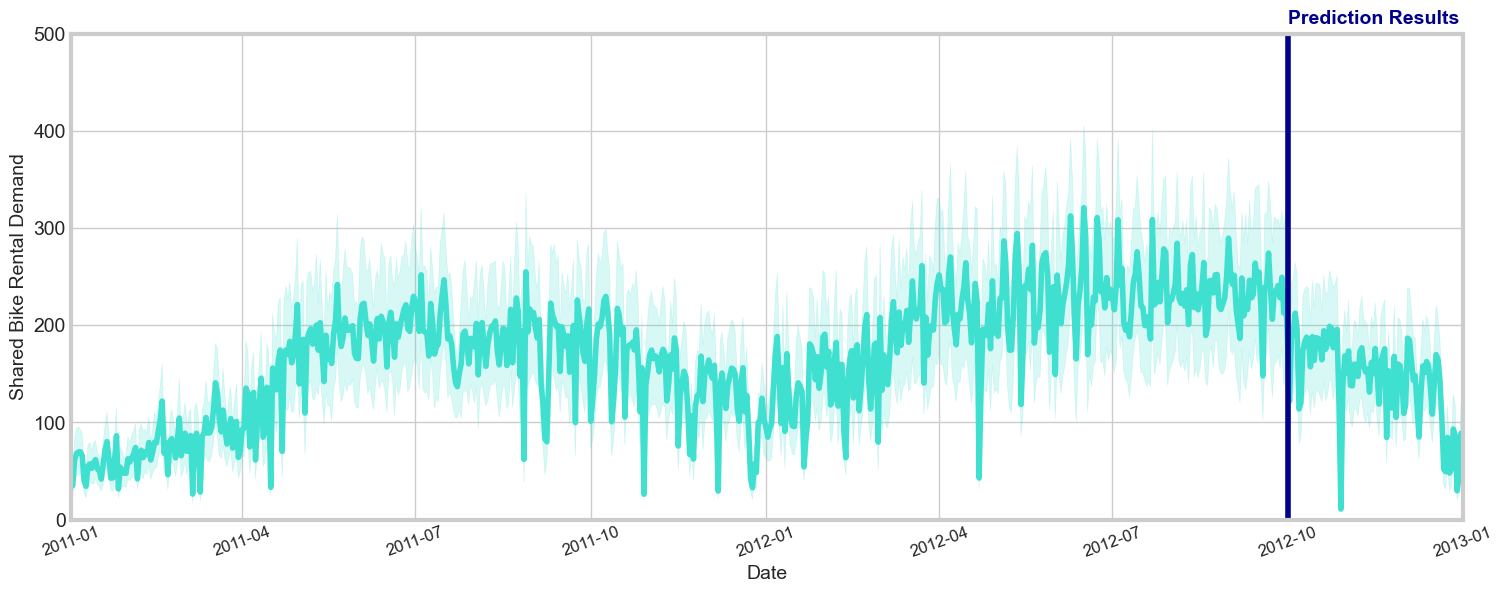

In [426]:
# Creating the line plot with seaborn.
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
sns.lineplot(x = full_bike_dataset.index.date, y = 'cnt', data = full_bike_dataset, color='turquoise')

# Setting the x and y axis labels and font sizes.
plt.xlabel("Date", fontsize=14)
plt.ylabel("Shared Bike Rental Demand", fontsize=14)

# Rotating the x-axis labels for better readability.
plt.xticks(rotation = 20, fontsize=12)

# Setting the xlim and ylim to zoom in on the data after September 2012.
plt.xlim(pd.Timestamp('2011-01-01'), pd.Timestamp('2013-01-01'))
plt.ylim(0, 500)

# Adding vertical lines to mark the start of the prediction.
plt.axvline(x=pd.Timestamp('2012-10-01'), color='darkblue')
plt.text(pd.Timestamp('2012-10-01'), 510, 'Prediction Results', fontsize=14, color='darkblue', weight='bold')

# Showing the plot.
plt.show()

### **• Plotting the Temperature Evolution in the Same Period:**

Plotting the temperature evolution over the period of 2011-01-01 to 2012-12-31.

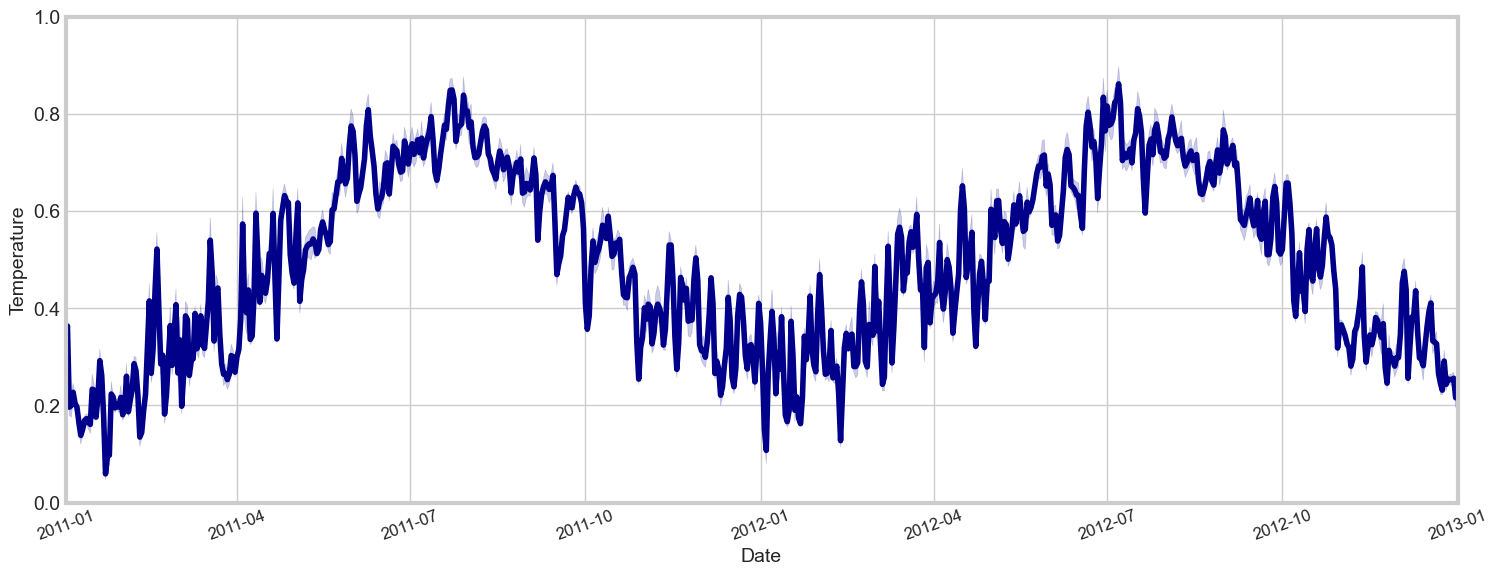

In [437]:
# Creating the line plot with seaborn.
sns.set_style("whitegrid")
plt.figure(figsize=(16,6))
sns.lineplot(x = full_bike_dataset.index.date, y = 'temp', data = full_bike_dataset, color='darkblue')

# Setting the x and y axis labels and font sizes.
plt.xlabel("Date", fontsize=14)
plt.ylabel("Temperature", fontsize=14)

# Rotating the x-axis labels for better readability.
plt.xticks(rotation = 20, fontsize=12)

# Setting the xlim and ylim to zoom in on the data after September 2012.
plt.xlim(pd.Timestamp('2011-01-01'), pd.Timestamp('2013-01-01'))
plt.ylim(0, 1)

# Showing the plot.
plt.show()

### **• Computing Total Demand in Q4 of 2012:**

Computing the **estimated total number of rides in Q4 of 2012**.

In [434]:
# Filtering the dataset for Q4 of 2012.
q4_2012_data = full_bike_dataset['2012-10-01':'2012-12-31']

# Calculating the expected total number of rides in Q4 of 2012.
total_rides_q4_2012 = q4_2012_data['cnt'].sum().round()

print(f"Total number of rides in Q4 of 2012: {int(total_rides_q4_2012)} rides.")

Total number of rides in Q4 of 2012: 317328 rides.


--------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **PART VI: Conclusion and Limitations**

### **• Conclusions:**

The application of machine learning models has provided valuable insights for addressing the problem of forecasting bike rental demand.

- **Best Model:** 

The best model in this case was the **XGBoost regressor**. Theoretically speaking, XGBoost is known for its ability to handle a wide range of data types and relationships within the dataset. It is a method of **ensemble learning that integrates numerous weak models (decision trees) to produce a more accurate and robust model**. By iteratively adding new trees to the ensemble and minimizing the loss function by optimizing its parameters through gradient boosting, this method allows the model to **capture complex, non-linear patterns in the data and enhance its prediction performance.**

<center><img src="XGBoost_diagram.png"/></center>

- **Other Models:**

In comparison, other models such as **Linear Regression and MLP Regression**, are based on **simpler assumptions regarding variable relationships**. Linear Regression is based on the assumption of a linear relationship between the features and the target variable, which may not necessarily be true in real-world datasets. MLP Regression, while more flexible than Linear Regression, is dependent on neural network design and may require substantial tuning to obtain good results.

Tree-based models, on the other hand, such as **Decision Tree Regressor and Random Forest Regressor**, offer the benefit of managing non-linear connections and feature interactions organically. Nevertheless, Decision Trees are prone to overfitting, whereas **Random Forest**, while more resilient, **still fell short of XGBoost in terms of prediction performance**.

- **Business Results:**

While being capable of predicting the **total demand for Q4 of 2012: 317328 rides**, PedalPals managers gained valuable information that contributed towards their decision to internationalize.

By estimating that they would capture 5% of these rides immediatly upon expansion, other important analysis such as revenues planning, required equipment investment, among others will also possible.

Notwithstanding the predicted **negative trend shown in US shared bike demand in Q4 of 2012**, this is a reasonable evolution (that also happened in the previous year) since with cooler temperatures and probably rain, people tend to ride less bikes. In any case, the fact that the predicted ride threshold of 300,000 rides was met gives the firm confidence that its internationalization in Q4 will be data-driven and well-supported.

### **• Limitations:**

While this business case gave significant insights on anticipating bike rental demand to make an important internationalization decision, there are certain limitations that should be acknowledged:

- **Feature Engineering:**

Although some new transformation variables were added to the dataset, including some polynomial ones, the current set of features used for modeling may not have captured all the relevant information affecting bike rental demand. For future improvements, additional features like competing transportation options or other combinations of already existing ones, could be considered to improve the model's predictive power.

- **Hyperparameter Tuning:**

The models' performance might be enhanced by conducting a more comprehensive search for optimum hyperparameters. Although Grid Search CV was used, other ones such as Random Search or Tune Grid Search might also be employed to determine better combinations of hyperparameters for each model, perhaps leading to improved performance.

- **Temporal Aspects:** 

Time series data include underlying temporal patterns that may have gone unnoticed in the current modeling technique. To explicitly handle the time-dependent character of the data, neural networks such as ARIMA, or LSTM (Long Short-Term Memory) may be explored in the future.

- **Prediction Process:**

Considering that certain features in the prediction data were real and that some of these were correlated with the target column `cnt` (e.g., pct_registered), the final prediction results may be somewhat biased. While the developed reasoning and prediction process that were used are valid for the proposed exercise, using only variables in the prediction dataset that would have been estimated by other models could have led to more impartial results.

- **Model Interpretability:**

Complex models, such as the XGBoost, may be more difficult to understand than simpler models, such as a Linear Regression. It is vital to set a balance between prediction accuracy and interpretability, especially when the goal is to provide actionable information to decision-makers.

All in all, future modelling efforts from PedalPals might possibly generate even better results in terms of both forecast performance and general understanding of the variables influencing bike rental demand in the US, by addressing some of these limitations and/or adopting alternate methodologies.